# Âü∫‰∫éHDDMÊ®°Êãü2back‰ªªÂä°

## 1.Âä†ËΩΩpackages

In [1]:
import sys

print("Python ÁâàÊú¨:", sys.version)

Python ÁâàÊú¨: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 17:23:23) 
[GCC 10.3.0]


In [2]:
%matplotlib inline

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az
print("The current HDDM version is: ", hddm.__version__)
print("The current kabuki version is: ", kabuki.__version__)
print("The current PyMC version is: ", pm.__version__)
print("The current ArviZ version is: ", az.__version__)

The current HDDM version is:  1.0.1RC
The current kabuki version is:  0.6.5RC4
The current PyMC version is:  2.3.8
The current ArviZ version is:  0.15.1


## 2.ÂØºÂÖ•Êï∞ÊçÆÈõÜ

In [3]:
! pip install openpyxl

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 250.9/250.9 kB 376.9 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import hddm
import matplotlib.pyplot as plt
import seaborn as sns

# ËØªÂèñ Excel Êñá‰ª∂
file_path = './rawdata.xlsx'
trial_data = pd.read_excel(file_path)

# Ê∏ÖÁêÜÂàóÂêç‰∏≠ÁöÑÁ©∫Ê†º
trial_data.columns = trial_data.columns.str.strip()

# Á°Æ‰øùÂèçÂ∫îÊó∂Èó¥Âàó 'rt' Ë¢´ËΩ¨Êç¢‰∏∫ÊµÆÁÇπÊï∞Á±ªÂûã
trial_data['rt'] = pd.to_numeric(trial_data['rt'], errors='coerce')

# Á°Æ‰øù 'Group' ÂàóÁöÑÊï∞ÊçÆÁ±ªÂûã‰∏∫Â≠óÁ¨¶‰∏≤ÔºåÂπ∂ÂéªÈô§ÂèØËÉΩÁöÑÁ©∫Ê†º
trial_data['Group'] = trial_data['Group'].astype(str).str.strip()

# Ê£ÄÊü•Êï∞ÊçÆ
print(trial_data.tail())
print(f"The number of trials: {trial_data.shape[0]}")
print(f"The number of variables: {trial_data.shape[1]}")
print(f"The number of participants: {trial_data['subj_idx'].unique().shape[0]}")

# ÈáçÊñ∞ÂëΩÂêçÂøÖË¶ÅÁöÑÂàóÔºåÁ°Æ‰øù‰∏é HDDM ÁöÑË¶ÅÊ±Ç‰∏ÄËá¥
data = hddm.utils.flip_errors(trial_data)

# Êï∞ÊçÆÊ£ÄÊü•ÂÆåÊàêÔºåÂáÜÂ§áÂêéÁª≠Ê®°ÂûãÁöÑÊûÑÂª∫

          ID  subj_idx  response     rt Group
16296  16363       272         1  0.123     1
16297  16364       272         1  0.172     1
16298  16365       272         0  0.027     1
16299  16366       272         0  0.023     1
16300  16367       272         0  0.143     1
The number of trials: 16301
The number of variables: 5
The number of participants: 211


In [5]:
data=trial_data

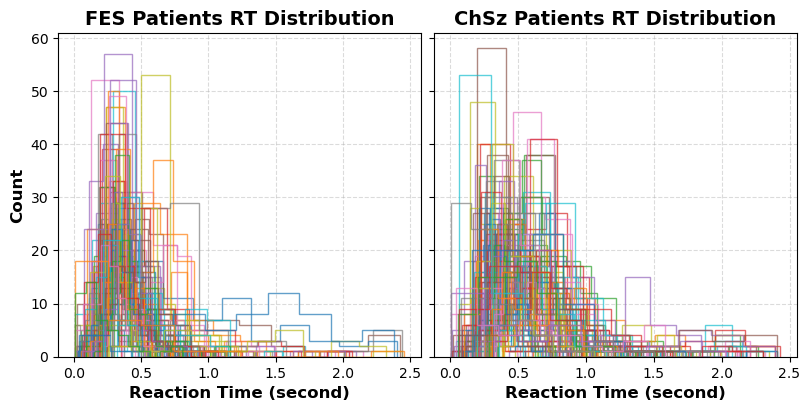

In [6]:
import matplotlib.pyplot as plt

# ÂàÜÁªÑÊ†áÁ≠æÊò†Â∞ÑÔºàÂ≠óÁ¨¶‰∏≤Á±ªÂûãÔºâ
group_labels = {
    '1': 'FES Patients',
    '2': 'ChSz Patients'
}

# Á°Æ‰øùÁªÑÁöÑÈ°∫Â∫è‰∏∫ ['1', '2']
groups = ['1', '2']

# ÂàõÂª∫Â≠êÂõæ
fig, axs = plt.subplots(1, len(groups), figsize=(8, 4), sharey=True, constrained_layout=True)

for idx, group in enumerate(groups):
    group_data = data[data['Group'] == group]
    ax = axs[idx]  # ÂΩìÂâçÂ≠êÂõæ
    ax.set_title(f"{group_labels[group]} RT Distribution", fontsize=14, weight='bold')
    
    # ÁªòÂà∂ÊØè‰∏™ subj_idx ÁöÑÂèçÂ∫îÊó∂Èó¥ÂàÜÂ∏É
    for subj_idx, subj_data in group_data.groupby('subj_idx'):
        subj_data.rt.hist(bins=10, histtype='step', ax=ax, alpha=0.7)
    
    ax.set_xlabel('Reaction Time (second)', fontsize=12, weight='bold')
    if idx == 0:  # ‰ªÖÂú®Á¨¨‰∏Ä‰∏™Â≠êÂõæ‰∏≠ËÆæÁΩÆ Y ËΩ¥Ê†áÁ≠æ
        ax.set_ylabel('Count', fontsize=12, weight='bold')
    
    # Ê∑ªÂä†ÁΩëÊ†ºÁ∫ø
    ax.grid(axis='both', linestyle='--', alpha=0.45)  # ËÆæÁΩÆÁΩëÊ†ºÁ∫ø‰∏∫ËôöÁ∫øÔºåÈÄèÊòéÂ∫¶‰∏∫ 0.7

# ‰øùÂ≠òÂõæÂÉè
plt.savefig('rt_distributions_by_group_with_grid.jpg', dpi=1200, bbox_inches='tight')
plt.show()

In [7]:
# Ê£ÄÊü• Group ÂàóÁöÑÂîØ‰∏ÄÂÄºÂèäÂÖ∂Êï∞ÊçÆÁ±ªÂûã
print(data['Group'].unique())
print(data['Group'].dtype)

# Á°Æ‰øù Group ÂàóÁöÑÂÄº‰∏∫Â≠óÁ¨¶‰∏≤Á±ªÂûãÔºåÂπ∂ÁßªÈô§ÂèØËÉΩÂ≠òÂú®ÁöÑÁ©∫Ê†º
data['Group'] = data['Group'].astype(str).str.strip()

# ÂÜçÊ¨°ËÆ°ÁÆó Group 1 Âíå Group 2 ‰∏≠ÁöÑÂîØ‰∏ÄË¢´ËØïÊï∞Èáè
unique_group1_subjects = data[data['Group'] == '1']['subj_idx'].nunique()
unique_group2_subjects = data[data['Group'] == '2']['subj_idx'].nunique()

print(f"First episode of schizophrenia = {unique_group1_subjects}")
print(f"Chronic schizophrenia = {unique_group2_subjects}")

['2' '1']
object
First episode of schizophrenia = 103
Chronic schizophrenia = 108


#### 1.Ê®°ÂûãËÆæËÆ°

In [8]:
import hddm

# ÊâìÂç∞Êï∞ÊçÆÁöÑÁ±ªÂûãÔºåÁ°Æ‰øùÊï∞ÊçÆÊ†ºÂºèÊ≠£Á°Æ
# Êï∞ÊçÆÂ∫î‰∏∫‰∏Ä‰∏™ Pandas DataFrameÔºåÂåÖÂê´ÂèçÂ∫îÊó∂Èó¥ÔºàRTÔºâ„ÄÅÊ≠£Á°ÆÊÄßÔºàaccuracyÔºâ‰ª•ÂèäÁªÑÂà´Á≠âÂàó
print(f"Data type: {type(data)}")

# Âü∫Á°ÄÊ®°ÂûãÔºàm0ÔºâÔºöÂåÖÂê´ÊâÄÊúâÊ†∏ÂøÉÂèÇÊï∞ÂíåÂèòÂºÇÊÄßÂèÇÊï∞
# ËØ•Ê®°Âûã‰∏çËÄÉËôëÊù°‰ª∂ÊàñÁªÑÂà´ÔºåÂè™Áî®‰∫éÂÖ®Â±ÄÂèÇÊï∞‰º∞ËÆ°
m0 = hddm.HDDM(
    data, 
    include=['a', 'v', 't', 'z', 'sv', 'sz', 'st']  # ÂåÖÂê´ÊâÄÊúâÂèÇÊï∞ÂíåÂèòÂºÇÊÄßÂèÇÊï∞
)

# ÁªºÂêàÊ®°ÂûãÔºàm2ÔºâÔºöÂàÜÂ±ÇÊ®°ÂûãÔºåÊé¢Á¥¢ÊâÄÊúâÁªÑÂà´Èó¥ÂèÇÊï∞ÁöÑÂèòÂåñ
# ÂÅáËÆæÊ†∏ÂøÉÂèÇÊï∞Ôºàa, v, t, zÔºâ‰æùËµñ‰∫éÁªÑÂà´ÔºàGroupÔºâ
m1 = hddm.HDDM(
    data, 
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],  # ÂåÖÂê´ÊâÄÊúâÊ†∏ÂøÉÂèÇÊï∞ÂíåÂèòÂºÇÊÄßÂèÇÊï∞
    depends_on={  # ÂÅáËÆæÂèÇÊï∞‰æùËµñ‰∫éÁªÑÂà´
        'a': ['Group'], 
        'v': ['Group'], 
        't': ['Group'],
        'z': ['Group']
    }
)


# ÂõûÂΩíÊ®°ÂûãÔºàm3vÔºâÔºöÂàÜÊûêÁªÑÂà´ÂØπÊºÇÁßªÁéáÔºàvÔºâÁöÑÂΩ±Âìç
m2v = hddm.HDDMRegressor(
    data,
    "v ~ 1 + C(Group, Treatment('2'))",  # ÊºÇÁßªÁéá v ÁöÑÂõûÂΩíÂÖ¨ÂºèÔºåGroup ‰∏∫ÂàÜÁªÑÂèòÈáèÔºå'2' ‰∏∫ÂèÇËÄÉÁªÑ
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],  # ÂåÖÂê´ÊâÄÊúâÊ†∏ÂøÉÂèÇÊï∞ÂíåÂèòÂºÇÊÄßÂèÇÊï∞
    group_only_regressors=False,  # ÂÖÅËÆ∏‰∏™‰ΩìÂ±ÇÈù¢ÁöÑÂèòÂåñ
    keep_regressor_trace=True  # ‰øùÁïôÂõûÂΩíÁ≥ªÊï∞ÁöÑ MCMC ÈááÊ†∑ËΩ®Ëøπ
)

# ÂõûÂΩíÊ®°ÂûãÔºàm3zÔºâÔºöÂàÜÊûêÁªÑÂà´ÂØπËµ∑ÂßãÁÇπÂÅèÁßªÔºàzÔºâÁöÑÂΩ±Âìç
m2z = hddm.HDDMRegressor(
    data,
    "z ~ 1 + C(Group, Treatment('2'))",  # Ëµ∑ÂßãÁÇπ z ÁöÑÂõûÂΩíÂÖ¨Âºè
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],
    group_only_regressors=False,
    keep_regressor_trace=True
)

# ÂõûÂΩíÊ®°ÂûãÔºàm3aÔºâÔºöÂàÜÊûêÁªÑÂà´ÂØπÂÜ≥Á≠ñÁïåÈôêÔºàaÔºâÁöÑÂΩ±Âìç
m2a = hddm.HDDMRegressor(
    data,
    "a ~ 1 + C(Group, Treatment('2'))",  # ÂÜ≥Á≠ñÁïåÈôê a ÁöÑÂõûÂΩíÂÖ¨Âºè
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],
    group_only_regressors=False,
    keep_regressor_trace=True
)

# ÂõûÂΩíÊ®°ÂûãÔºàm3tÔºâÔºöÂàÜÊûêÁªÑÂà´ÂØπÈùûÂÜ≥Á≠ñÊó∂Èó¥ÔºàtÔºâÁöÑÂΩ±Âìç
m2t = hddm.HDDMRegressor(
    data,
    "t ~ 1 + C(Group, Treatment('2'))",  # ÈùûÂÜ≥Á≠ñÊó∂Èó¥ t ÁöÑÂõûÂΩíÂÖ¨Âºè
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],
    group_only_regressors=False,
    keep_regressor_trace=True
)

# ÊâìÂç∞Ê®°ÂûãÂàùÂßãÂåñÂÆåÊàêÁöÑ‰ø°ÊÅØ
print('Ê®°ÂûãÂ∑≤ÊàêÂäüÂàùÂßãÂåñÔºÅüòÑ')

Data type: <class 'pandas.core.frame.DataFrame'>
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
Ê®°ÂûãÂ∑≤ÊàêÂäüÂàùÂßãÂåñÔºÅüòÑ


#### 2.Ê®°ÂûãÊãüÂêàÂèÇÊï∞Èáè 

In [9]:
def run_sampling(
    m,
    n_samples=10000,  # 10,000
    n_burn=5000,     # 5000
    n_chains=4,      # 4
    thin=2,  # ThinningÔºöÊØèÈöî2‰∏™Ê†∑Êú¨‰øùÁïô1‰∏™
    model_name="m",
    progress_bar=True
):
    m_infdata = m.sample(
        n_samples,
        burn=n_burn,
        chains=n_chains,
        return_infdata=True,
        save_name="8.model_fitted/" + model_name,
        progress_bar=progress_bar
    )

    return m, m_infdata


# ËÆ°ÁÆóÊó∂Èó¥‰º∞ËÆ°
print('ÊãüÂêàÂèÇÊï∞ËÆæÁΩÆÊàêÂäü!')

ÊãüÂêàÂèÇÊï∞ËÆæÁΩÆÊàêÂäü!


**Ê≥®ÔºöÂú®ÈÖçÂ§á 2.90GHz Ëã±ÁâπÂ∞î¬ÆÈÖ∑Áùø‚Ñ¢i7-10700 Â§ÑÁêÜÂô®ÁöÑÁîµËÑë‰∏äÔºåÁî®‰∏äËø∞ËÆæÁΩÆÔºà10000 ‰∏™Ê†∑Êú¨ÔºâÊãüÂêàÊâÄÊúâËøôÂÖ≠‰∏™Ê®°ÂûãÂ§ßÁ∫¶ÈúÄË¶Å 8-9 ‰∏™Â∞èÊó∂„ÄÇÊ≠§Â§ñÔºåÂÜÖÂ≠òÂ∫îË∂≥Â§üÂ§ßÔºåÂª∫ËÆÆ‰ΩøÁî® ~ 64 G ÂÜÖÂ≠ò„ÄÇÂê¶ÂàôÔºåÂª∫ËÆÆ‰ΩøÁî®Â∞ëÈáèÊ†∑Êú¨ÔºàÂ¶Ç n_samples=2500Ôºåburn=1000Ôºâ„ÄÇ

#### 3.ËØªÂèñ‰πãÂâçÂ•ΩÁöÑÊ®°ÂûãüòÇ

In [10]:
import pickle

# Ê®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆÁöÑÊñá‰ª∂Âêç
model_names = ["m2a","m2t","m2v","m2z"] 
 
# ÂàõÂª∫Â≠óÂÖ∏Â≠òÂÇ®Ê®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
models = {}
infdata = {}

# Âä†ËΩΩÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
for name in model_names:
    model_file_path = f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{name}_model.pkl'
    infdata_file_path = f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{name}_infdata.pkl'
    
    # ÈáçÊñ∞Âä†ËΩΩÊ®°Âûã
    with open(model_file_path, 'rb') as f_model:
        models[name] = pickle.load(f_model)
    
    # ÈáçÊñ∞Âä†ËΩΩÊé®Êñ≠Êï∞ÊçÆ
    with open(infdata_file_path, 'rb') as f_infdata:
        infdata[name] = pickle.load(f_infdata)
    
    # Âä®ÊÄÅËµãÂÄºÂõûÂéüÂßãÂèòÈáèÂêç
    globals()[name] = models[name]
    globals()[f"{name}_infdata"] = infdata[name]
    
    print(f"{name} Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!")

# ÊâìÂç∞Â∑≤Âä†ËΩΩÁöÑÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
for name in model_names:
    print(f"{name} Ê®°Âûã:", globals()[name])
    print(f"{name} Êé®Êñ≠Êï∞ÊçÆ:", globals()[f"{name}_infdata"])

print('ÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆËØªÂèñÊàêÂäü!üòÇ')

m2a Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!
m2t Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!
m2v Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!
m2z Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!
m2a Ê®°Âûã: <hddm.models.hddm_regression.HDDMRegressor object at 0xffff7996f910>
m2a Êé®Êñ≠Êï∞ÊçÆ: Inference data with groups:
	> posterior
	> observed_data
m2t Ê®°Âûã: <hddm.models.hddm_regression.HDDMRegressor object at 0xffff008a3a30>
m2t Êé®Êñ≠Êï∞ÊçÆ: Inference data with groups:
	> posterior
	> observed_data
m2v Ê®°Âûã: <hddm.models.hddm_regression.HDDMRegressor object at 0xffff0082ad60>
m2v Êé®Êñ≠Êï∞ÊçÆ: Inference data with groups:
	> posterior
	> observed_data
m2z Ê®°Âûã: <hddm.models.hddm_regression.HDDMRegressor object at 0xffff0d019670>
m2z Êé®Êñ≠Êï∞ÊçÆ: Inference data with groups:
	> posterior
	> observed_data
ÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆËØªÂèñÊàêÂäü!üòÇ


In [11]:
import pickle

# Ê®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆÁöÑÊñá‰ª∂Âêç
model_names = ["m0","m1",] 
 
# ÂàõÂª∫Â≠óÂÖ∏Â≠òÂÇ®Ê®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
models = {}
infdata = {}

# Âä†ËΩΩÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
for name in model_names:
    model_file_path = f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{name}_model.pkl'
    infdata_file_path = f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{name}_infdata.pkl'
    
    # ÈáçÊñ∞Âä†ËΩΩÊ®°Âûã
    with open(model_file_path, 'rb') as f_model:
        models[name] = pickle.load(f_model)
    
    # ÈáçÊñ∞Âä†ËΩΩÊé®Êñ≠Êï∞ÊçÆ
    with open(infdata_file_path, 'rb') as f_infdata:
        infdata[name] = pickle.load(f_infdata)
    
    # Âä®ÊÄÅËµãÂÄºÂõûÂéüÂßãÂèòÈáèÂêç
    globals()[name] = models[name]
    globals()[f"{name}_infdata"] = infdata[name]
    
    print(f"{name} Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!")

# ÊâìÂç∞Â∑≤Âä†ËΩΩÁöÑÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
for name in model_names:
    print(f"{name} Ê®°Âûã:", globals()[name])
    print(f"{name} Êé®Êñ≠Êï∞ÊçÆ:", globals()[f"{name}_infdata"])

print('ÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆËØªÂèñÊàêÂäü!üòÇ')

m0 Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!
m1 Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!
m0 Ê®°Âûã: <hddm.models.hddm_info.HDDM object at 0xffff0fc03df0>
m0 Êé®Êñ≠Êï∞ÊçÆ: Inference data with groups:
	> posterior
	> observed_data
m1 Ê®°Âûã: <hddm.models.hddm_info.HDDM object at 0xffff0fc03d00>
m1 Êé®Êñ≠Êï∞ÊçÆ: Inference data with groups:
	> posterior
	> observed_data
ÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆËØªÂèñÊàêÂäü!üòÇ


In [12]:
import pickle

# ÂÆö‰πâÊ®°ÂûãÂêçÁß∞ÂàóË°®
model_names = ["m2a","m2t","m2v","m2z"]
posterior_distributions = {}

# Âæ™ÁéØÂä†ËΩΩÊØè‰∏™Ê®°ÂûãÂπ∂ÊèêÂèñÂêéÈ™åÂàÜÂ∏É
for model_name in model_names:
    print(f"ÊèêÂèñ {model_name} ÁöÑÂêéÈ™åÂàÜÂ∏É...")
    
    # Âä†ËΩΩÊ®°Âûã
    with open(f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{model_name}_model.pkl', 'rb') as f_model:
        model_loaded = pickle.load(f_model)
    
    # ÊèêÂèñÂêéÈ™åÂàÜÂ∏É
    posterior_samples = model_loaded.get_traces()
    
    # Â∞ÜÊØè‰∏™Ê®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÂ≠òÂÇ®Âú®Â≠óÂÖ∏‰∏≠
    posterior_distributions[model_name] = posterior_samples
    
    # ÊâìÂç∞ÊèêÂèñÁöÑÂêéÈ™åÂàÜÂ∏ÉÁöÑÂâçÂá†Ë°å
    print(f"{model_name}ÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:")

print("ÊâÄÊúâÊ®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàêÔºÅüòÇ")


#Âæó20ÂàÜÈíü

ÊèêÂèñ m2a ÁöÑÂêéÈ™åÂàÜÂ∏É...
m2aÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:
ÊèêÂèñ m2t ÁöÑÂêéÈ™åÂàÜÂ∏É...
m2tÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:
ÊèêÂèñ m2v ÁöÑÂêéÈ™åÂàÜÂ∏É...
m2vÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:
ÊèêÂèñ m2z ÁöÑÂêéÈ™åÂàÜÂ∏É...
m2zÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:
ÊâÄÊúâÊ®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàêÔºÅüòÇ


In [13]:
import pickle

# ÂÆö‰πâÊ®°ÂûãÂêçÁß∞ÂàóË°®
model_names = ["m0","m1"]
posterior_distributions = {}

# Âæ™ÁéØÂä†ËΩΩÊØè‰∏™Ê®°ÂûãÂπ∂ÊèêÂèñÂêéÈ™åÂàÜÂ∏É
for model_name in model_names:
    print(f"ÊèêÂèñ {model_name} ÁöÑÂêéÈ™åÂàÜÂ∏É...")
    
    # Âä†ËΩΩÊ®°Âûã
    with open(f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{model_name}_model.pkl', 'rb') as f_model:
        model_loaded = pickle.load(f_model)
    
    # ÊèêÂèñÂêéÈ™åÂàÜÂ∏É
    posterior_samples = model_loaded.get_traces()
    
    # Â∞ÜÊØè‰∏™Ê®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÂ≠òÂÇ®Âú®Â≠óÂÖ∏‰∏≠
    posterior_distributions[model_name] = posterior_samples
    
    # ÊâìÂç∞ÊèêÂèñÁöÑÂêéÈ™åÂàÜÂ∏ÉÁöÑÂâçÂá†Ë°å
    print(f"{model_name}ÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:")

print("ÊâÄÊúâÊ®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàêÔºÅüòÇ")


#Âæó20ÂàÜÈíü

ÊèêÂèñ m0 ÁöÑÂêéÈ™åÂàÜÂ∏É...
m0ÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:
ÊèêÂèñ m1 ÁöÑÂêéÈ™åÂàÜÂ∏É...
m1ÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:
ÊâÄÊúâÊ®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàêÔºÅüòÇ


#### 4.Êü•ÁúãÂÜÖÂ≠ò

In [14]:
import psutil
print(f"Available memory: {psutil.virtual_memory().available / (1024**3):.2f} GB")

Available memory: 7.48 GB


## 3.Ê®°ÂûãËØäÊñ≠

#### Ôºà1ÔºâÊñπÊ≥ï1.Trace plot

We can also only plot selected parameters' traces. 
 
- use regex to select var_names that start with "a" and do not contain either "subj" or "std".

print(tmp_infdata.posterior.dims)
print(tmp_infdata.posterior.coords)
print(tmp_infdata.posterior.data_vars)##### M0

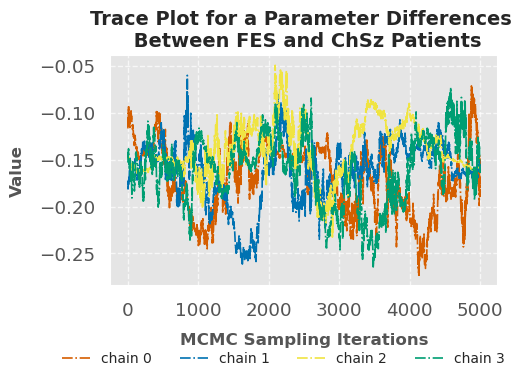

In [44]:
import matplotlib.pyplot as plt
import os  # ÂØºÂÖ• os Ê®°Âùó‰ª•ÂàõÂª∫Êñá‰ª∂Â§π

# Ê®°ÂûãÂêçÁß∞ÂàóË°®
model_names = ['m2a']  

# ÂÆö‰πâÈúÄË¶ÅÊ£ÄÊü•ÁöÑÂèÇÊï∞
parameters = ['a_C(Group, Treatment(\'2\'))[T.1]']

# Ëá™ÂÆö‰πâ chain È¢úËâ≤Ôºà‰∏∫4‰∏™ÈìæËÆæÁΩÆÈ¢úËâ≤Ôºâ

chain_colors = ['#D55E00', '#0072B2', '#F0E442', '#009E73']  # È´òÂØπÊØîNatureÈ£éÊ†ºÈÖçËâ≤
# Â§ñÈÉ®Âæ™ÁéØÔºåÈÅçÂéÜÊØè‰∏™Ê®°Âûã
for model_name in model_names:
    # Ëé∑ÂèñÂä†ËΩΩÁöÑÊé®Êñ≠Êï∞ÊçÆ
    tmp_infdata = globals()[f'{model_name}_infdata']
    
    # ‰∏∫ÊØè‰∏™Ê®°ÂûãÂàõÂª∫Êñá‰ª∂Â§π
    output_folder = f'3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/{model_name}'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # ÂÜÖÈÉ®Âæ™ÁéØÔºåÈÅçÂéÜÊØè‰∏™ÂèÇÊï∞ÔºåÁîüÊàê trace plot
    for param in parameters:
        # Á°ÆÂÆö var_names ÂàóË°®ÔºàÁõ¥Êé•Âü∫‰∫éÂèÇÊï∞ÂêçÁß∞Ôºâ
        var_names = [f'{param}']  # Â¶ÇÊûúÂèòÈáèÂêçÊúâÂÖ∂‰ªñÁâπÂÆöËßÑÂàôÔºåÂèØ‰ª•Ë∞ÉÊï¥ÁîüÊàêÈÄªËæë

        # ÊâãÂä®ÁªòÂà∂ÊØè‰∏™ÈìæÁöÑËΩ®Ëøπ
        for var_name in var_names:
            fig, ax = plt.subplots(figsize=(5, 3))

            # ÊâãÂä®ÁªòÂà∂ÊØèÊù°Èìæ
            for i, color in enumerate(chain_colors):
                chain_data = tmp_infdata.posterior[var_name].sel(chain=i)
               
                ax.plot(chain_data, color=color, label=f'chain {i}', linestyle='-.', linewidth=1.2)
            # Ê∑ªÂä† X ËΩ¥Âíå Y ËΩ¥Ê†áÁ≠æÔºåÂπ∂ËÆæÁΩÆÂ≠ó‰Ωì‰∏∫Á≤ó‰ΩìÔºåÂ¢ûÂä† pad
            ax.set_xlabel("MCMC Sampling Iterations", fontsize=12, fontweight='bold', labelpad=10)  # ËÆæÁΩÆ X ËΩ¥Ê†áÁ≠æÔºåÂ¢ûÂä† pad ÂíåÁ≤ó‰Ωì
            ax.set_ylabel(f'Value', fontsize=12, fontweight='bold', labelpad=10)  # ËÆæÁΩÆ Y ËΩ¥Ê†áÁ≠æÔºåÂ¢ûÂä† pad ÂíåÁ≤ó‰Ωì

            # ËÆæÁΩÆÊ†áÈ¢òÔºåÂ∞Ü var_name Âíå 'Trace Plot' ÁªìÂêà
            ax.set_title(f'Trace Plot for a Parameter Differences \n Between FES and ChSz Patients', fontsize=14, fontweight='bold')

            ax.grid(True, linestyle='--', alpha=0.7)
            ax.legend(
                fontsize=10, 
                frameon=False,  # ÂéªÊéâÂ§ñËæπÊ°Ü
                ncol=4, 
                fancybox=True, 
                bbox_to_anchor=(1.05, -0.23)
            )

            # ‰øùÂ≠òÂõæÁâá‰∏∫ 600 DPI ÁöÑ JPEG Ê†ºÂºèÂà∞ÂØπÂ∫îÊ®°ÂûãÁöÑÊñá‰ª∂Â§π
            plt.savefig(f'{output_folder}/{model_name}_{param}_trace_plot2a.jpg', dpi=1200, format='jpg', bbox_inches='tight')
            plt.show()

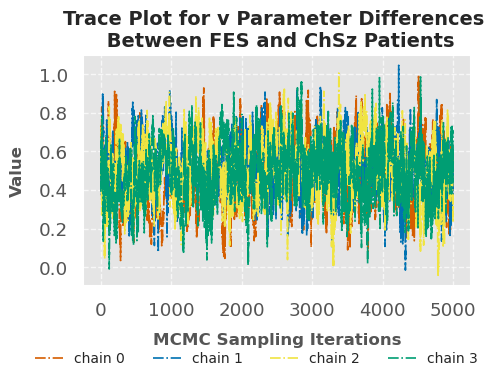

In [45]:
import matplotlib.pyplot as plt
import os  # ÂØºÂÖ• os Ê®°Âùó‰ª•ÂàõÂª∫Êñá‰ª∂Â§π

# Ê®°ÂûãÂêçÁß∞ÂàóË°®
model_names = ['m2v']  

# ÂÆö‰πâÈúÄË¶ÅÊ£ÄÊü•ÁöÑÂèÇÊï∞
parameters = ['v_C(Group, Treatment(\'2\'))[T.1]']

# Ëá™ÂÆö‰πâ chain È¢úËâ≤Ôºà‰∏∫4‰∏™ÈìæËÆæÁΩÆÈ¢úËâ≤Ôºâ

chain_colors = ['#D55E00', '#0072B2', '#F0E442', '#009E73']  # È´òÂØπÊØîNatureÈ£éÊ†ºÈÖçËâ≤
# Â§ñÈÉ®Âæ™ÁéØÔºåÈÅçÂéÜÊØè‰∏™Ê®°Âûã
for model_name in model_names:
    # Ëé∑ÂèñÂä†ËΩΩÁöÑÊé®Êñ≠Êï∞ÊçÆ
    tmp_infdata = globals()[f'{model_name}_infdata']
    
    # ‰∏∫ÊØè‰∏™Ê®°ÂûãÂàõÂª∫Êñá‰ª∂Â§π
    output_folder = f'3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/{model_name}'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # ÂÜÖÈÉ®Âæ™ÁéØÔºåÈÅçÂéÜÊØè‰∏™ÂèÇÊï∞ÔºåÁîüÊàê trace plot
    for param in parameters:
        # Á°ÆÂÆö var_names ÂàóË°®ÔºàÁõ¥Êé•Âü∫‰∫éÂèÇÊï∞ÂêçÁß∞Ôºâ
        var_names = [f'{param}']  # Â¶ÇÊûúÂèòÈáèÂêçÊúâÂÖ∂‰ªñÁâπÂÆöËßÑÂàôÔºåÂèØ‰ª•Ë∞ÉÊï¥ÁîüÊàêÈÄªËæë

        # ÊâãÂä®ÁªòÂà∂ÊØè‰∏™ÈìæÁöÑËΩ®Ëøπ
        for var_name in var_names:
            fig, ax = plt.subplots(figsize=(5, 3))

            # ÊâãÂä®ÁªòÂà∂ÊØèÊù°Èìæ
            for i, color in enumerate(chain_colors):
                chain_data = tmp_infdata.posterior[var_name].sel(chain=i)
               
                ax.plot(chain_data, color=color, label=f'chain {i}', linestyle='-.', linewidth=1.2)
            # Ê∑ªÂä† X ËΩ¥Âíå Y ËΩ¥Ê†áÁ≠æÔºåÂπ∂ËÆæÁΩÆÂ≠ó‰Ωì‰∏∫Á≤ó‰ΩìÔºåÂ¢ûÂä† pad
            ax.set_xlabel("MCMC Sampling Iterations", fontsize=12, fontweight='bold', labelpad=10)  # ËÆæÁΩÆ X ËΩ¥Ê†áÁ≠æÔºåÂ¢ûÂä† pad ÂíåÁ≤ó‰Ωì
            ax.set_ylabel(f'Value', fontsize=12, fontweight='bold', labelpad=10)  # ËÆæÁΩÆ Y ËΩ¥Ê†áÁ≠æÔºåÂ¢ûÂä† pad ÂíåÁ≤ó‰Ωì

            # ËÆæÁΩÆÊ†áÈ¢òÔºåÂ∞Ü var_name Âíå 'Trace Plot' ÁªìÂêà
            ax.set_title(f'Trace Plot for v Parameter Differences \n Between FES and ChSz Patients', fontsize=14, fontweight='bold')

            ax.grid(True, linestyle='--', alpha=0.7)
            ax.legend(
                fontsize=10, 
                frameon=False,  # ÂéªÊéâÂ§ñËæπÊ°Ü
                ncol=4, 
                fancybox=True, 
                bbox_to_anchor=(1.05, -0.23)
            )

            # ‰øùÂ≠òÂõæÁâá‰∏∫ 600 DPI ÁöÑ JPEG Ê†ºÂºèÂà∞ÂØπÂ∫îÊ®°ÂûãÁöÑÊñá‰ª∂Â§π
            plt.savefig(f'{output_folder}/{model_name}_{param}_trace_plot2v.jpg', dpi=1200, format='jpg', bbox_inches='tight')
            plt.show()

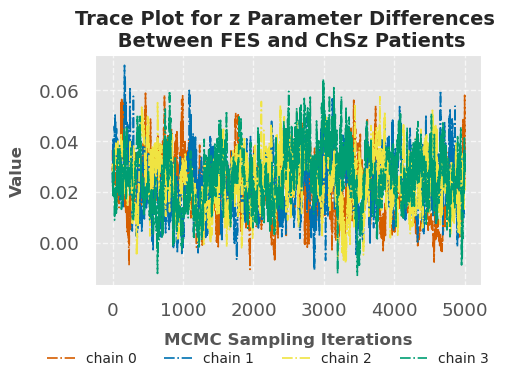

In [46]:
import matplotlib.pyplot as plt
import os  # ÂØºÂÖ• os Ê®°Âùó‰ª•ÂàõÂª∫Êñá‰ª∂Â§π

# Ê®°ÂûãÂêçÁß∞ÂàóË°®
model_names = ['m2z']  

# ÂÆö‰πâÈúÄË¶ÅÊ£ÄÊü•ÁöÑÂèÇÊï∞
parameters = ['z_C(Group, Treatment(\'2\'))[T.1]']

# Ëá™ÂÆö‰πâ chain È¢úËâ≤Ôºà‰∏∫4‰∏™ÈìæËÆæÁΩÆÈ¢úËâ≤Ôºâ

chain_colors = ['#D55E00', '#0072B2', '#F0E442', '#009E73']  # È´òÂØπÊØîNatureÈ£éÊ†ºÈÖçËâ≤
# Â§ñÈÉ®Âæ™ÁéØÔºåÈÅçÂéÜÊØè‰∏™Ê®°Âûã
for model_name in model_names:
    # Ëé∑ÂèñÂä†ËΩΩÁöÑÊé®Êñ≠Êï∞ÊçÆ
    tmp_infdata = globals()[f'{model_name}_infdata']
    
    # ‰∏∫ÊØè‰∏™Ê®°ÂûãÂàõÂª∫Êñá‰ª∂Â§π
    output_folder = f'3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/{model_name}'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # ÂÜÖÈÉ®Âæ™ÁéØÔºåÈÅçÂéÜÊØè‰∏™ÂèÇÊï∞ÔºåÁîüÊàê trace plot
    for param in parameters:
        # Á°ÆÂÆö var_names ÂàóË°®ÔºàÁõ¥Êé•Âü∫‰∫éÂèÇÊï∞ÂêçÁß∞Ôºâ
        var_names = [f'{param}']  # Â¶ÇÊûúÂèòÈáèÂêçÊúâÂÖ∂‰ªñÁâπÂÆöËßÑÂàôÔºåÂèØ‰ª•Ë∞ÉÊï¥ÁîüÊàêÈÄªËæë

        # ÊâãÂä®ÁªòÂà∂ÊØè‰∏™ÈìæÁöÑËΩ®Ëøπ
        for var_name in var_names:
            fig, ax = plt.subplots(figsize=(5, 3))

            # ÊâãÂä®ÁªòÂà∂ÊØèÊù°Èìæ
            for i, color in enumerate(chain_colors):
                chain_data = tmp_infdata.posterior[var_name].sel(chain=i)
               
                ax.plot(chain_data, color=color, label=f'chain {i}', linestyle='-.', linewidth=1.2)
            # Ê∑ªÂä† X ËΩ¥Âíå Y ËΩ¥Ê†áÁ≠æÔºåÂπ∂ËÆæÁΩÆÂ≠ó‰Ωì‰∏∫Á≤ó‰ΩìÔºåÂ¢ûÂä† pad
            ax.set_xlabel("MCMC Sampling Iterations", fontsize=12, fontweight='bold', labelpad=10)  # ËÆæÁΩÆ X ËΩ¥Ê†áÁ≠æÔºåÂ¢ûÂä† pad ÂíåÁ≤ó‰Ωì
            ax.set_ylabel(f'Value', fontsize=12, fontweight='bold', labelpad=10)  # ËÆæÁΩÆ Y ËΩ¥Ê†áÁ≠æÔºåÂ¢ûÂä† pad ÂíåÁ≤ó‰Ωì

            # ËÆæÁΩÆÊ†áÈ¢òÔºåÂ∞Ü var_name Âíå 'Trace Plot' ÁªìÂêà
            ax.set_title(f'Trace Plot for z Parameter Differences \n Between FES and ChSz Patients', fontsize=14, fontweight='bold')

            ax.grid(True, linestyle='--', alpha=0.7)
            ax.legend(
                fontsize=10, 
                frameon=False,  # ÂéªÊéâÂ§ñËæπÊ°Ü
                ncol=4, 
                fancybox=True, 
                bbox_to_anchor=(1.05, -0.23)
            )

            # ‰øùÂ≠òÂõæÁâá‰∏∫ 600 DPI ÁöÑ JPEG Ê†ºÂºèÂà∞ÂØπÂ∫îÊ®°ÂûãÁöÑÊñá‰ª∂Â§π
            plt.savefig(f'{output_folder}/{model_name}_{param}_trace_plot2z.jpg', dpi=1200, format='jpg', bbox_inches='tight')
            plt.show()

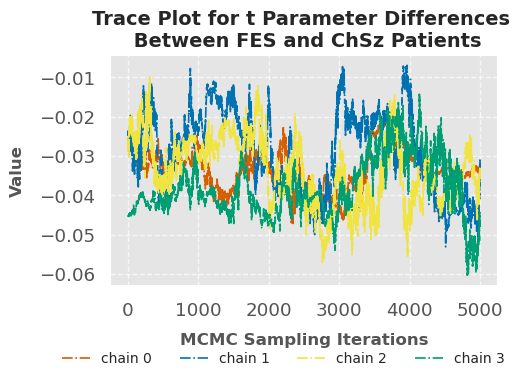

In [47]:
import matplotlib.pyplot as plt
import os  # ÂØºÂÖ• os Ê®°Âùó‰ª•ÂàõÂª∫Êñá‰ª∂Â§π

# Ê®°ÂûãÂêçÁß∞ÂàóË°®
model_names = ['m2t']  

# ÂÆö‰πâÈúÄË¶ÅÊ£ÄÊü•ÁöÑÂèÇÊï∞
parameters = ['t_C(Group, Treatment(\'2\'))[T.1]']

# Ëá™ÂÆö‰πâ chain È¢úËâ≤Ôºà‰∏∫4‰∏™ÈìæËÆæÁΩÆÈ¢úËâ≤Ôºâ

chain_colors = ['#D55E00', '#0072B2', '#F0E442', '#009E73']  # È´òÂØπÊØîNatureÈ£éÊ†ºÈÖçËâ≤
# Â§ñÈÉ®Âæ™ÁéØÔºåÈÅçÂéÜÊØè‰∏™Ê®°Âûã
for model_name in model_names:
    # Ëé∑ÂèñÂä†ËΩΩÁöÑÊé®Êñ≠Êï∞ÊçÆ
    tmp_infdata = globals()[f'{model_name}_infdata']
    
    # ‰∏∫ÊØè‰∏™Ê®°ÂûãÂàõÂª∫Êñá‰ª∂Â§π
    output_folder = f'3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/{model_name}'
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # ÂÜÖÈÉ®Âæ™ÁéØÔºåÈÅçÂéÜÊØè‰∏™ÂèÇÊï∞ÔºåÁîüÊàê trace plot
    for param in parameters:
        # Á°ÆÂÆö var_names ÂàóË°®ÔºàÁõ¥Êé•Âü∫‰∫éÂèÇÊï∞ÂêçÁß∞Ôºâ
        var_names = [f'{param}']  # Â¶ÇÊûúÂèòÈáèÂêçÊúâÂÖ∂‰ªñÁâπÂÆöËßÑÂàôÔºåÂèØ‰ª•Ë∞ÉÊï¥ÁîüÊàêÈÄªËæë

        # ÊâãÂä®ÁªòÂà∂ÊØè‰∏™ÈìæÁöÑËΩ®Ëøπ
        for var_name in var_names:
            fig, ax = plt.subplots(figsize=(5, 3))

            # ÊâãÂä®ÁªòÂà∂ÊØèÊù°Èìæ
            for i, color in enumerate(chain_colors):
                chain_data = tmp_infdata.posterior[var_name].sel(chain=i)
               
                ax.plot(chain_data, color=color, label=f'chain {i}', linestyle='-.', linewidth=1.2)
            # Ê∑ªÂä† X ËΩ¥Âíå Y ËΩ¥Ê†áÁ≠æÔºåÂπ∂ËÆæÁΩÆÂ≠ó‰Ωì‰∏∫Á≤ó‰ΩìÔºåÂ¢ûÂä† pad
            ax.set_xlabel("MCMC Sampling Iterations", fontsize=12, fontweight='bold', labelpad=10)  # ËÆæÁΩÆ X ËΩ¥Ê†áÁ≠æÔºåÂ¢ûÂä† pad ÂíåÁ≤ó‰Ωì
            ax.set_ylabel(f'Value', fontsize=12, fontweight='bold', labelpad=10)  # ËÆæÁΩÆ Y ËΩ¥Ê†áÁ≠æÔºåÂ¢ûÂä† pad ÂíåÁ≤ó‰Ωì

            # ËÆæÁΩÆÊ†áÈ¢òÔºåÂ∞Ü var_name Âíå 'Trace Plot' ÁªìÂêà
            ax.set_title(f'Trace Plot for t Parameter Differences \n Between FES and ChSz Patients', fontsize=14, fontweight='bold')

            ax.grid(True, linestyle='--', alpha=0.7)
            ax.legend(
                fontsize=10, 
                frameon=False,  # ÂéªÊéâÂ§ñËæπÊ°Ü
                ncol=4, 
                fancybox=True, 
                bbox_to_anchor=(1.05, -0.23)
            )

            # ‰øùÂ≠òÂõæÁâá‰∏∫ 600 DPI ÁöÑ JPEG Ê†ºÂºèÂà∞ÂØπÂ∫îÊ®°ÂûãÁöÑÊñá‰ª∂Â§π
            plt.savefig(f'{output_folder}/{model_name}_{param}_trace_plot2t.jpg', dpi=1200, format='jpg', bbox_inches='tight')
            plt.show()

#### Ôºà2ÔºâÊñπÊ≥ï2. $\hat{R}$ and ESS

In [19]:
import pandas as pd
import arviz as az

# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÂú®‰πãÂâçÁöÑ‰ª£Á†Å‰∏≠Âä®ÊÄÅÂä†ËΩΩ‰∫ÜÊé®Êñ≠Êï∞ÊçÆ
model_data = [m2a_infdata]  # ‰ΩøÁî®Ê≠£Á°ÆÁöÑÂÖ®Â±ÄÂèòÈáèÂêç
model_names = ['m2a']

# Âæ™ÁéØÂ§ÑÁêÜÊØè‰∏™Ê®°Âûã
for model_name, tmp_infdata in zip(model_names, model_data):
    
    # Ëé∑ÂèñR-hatÂ§ß‰∫é1.1ÁöÑÂèÇÊï∞ÂèäÂÖ∂ËØäÊñ≠ÁªüËÆ°Èáè
    summary_tmp = az.summary(tmp_infdata, kind="diagnostics", round_to=4)
    problem_params = summary_tmp[summary_tmp["r_hat"] > 1.1]

    # ÊâìÂç∞ÈóÆÈ¢òÂèÇÊï∞
    print(f"ÈóÆÈ¢òÂèÇÊï∞üò≠ - {model_name}:")
    print(problem_params)

    # Â∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠ò‰∏∫ExcelÊñá‰ª∂
    problem_params.to_excel(f"3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/problem_params-{model_name}.xlsx", index=True)
    print(f"Â∑≤ÊàêÂäüÂ∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠òËá≥ problem_params-{model_name}.xlsx Êñá‰ª∂")

    # Ëé∑ÂèñR-hatÂ∞è‰∫éÁ≠â‰∫é1.1ÁöÑÂèÇÊï∞
    good_params = summary_tmp[summary_tmp["r_hat"] <= 1.1]

    # ÊâìÂç∞Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞
    print(f"Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞üòÇ - {model_name}:")
    print(good_params)

    # Â∞ÜÊî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞‰øùÂ≠ò‰∏∫ExcelÊñá‰ª∂
    good_params.to_excel(f"3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/good_params-{model_name}.xlsx", index=True)
    print(f"Â∑≤ÊàêÂäüÂ∞ÜÊî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞‰øùÂ≠òËá≥ good_params-{model_name}.xlsx Êñá‰ª∂")

    # Âè™ËÆ°ÁÆó ESS
    ess_values = az.ess(tmp_infdata).values
    print(f"Ê®°Âûã {model_name} ÁöÑ ESS ÂÄºÔºö")
    print(ess_values)


ÈóÆÈ¢òÂèÇÊï∞üò≠ - m2a:
                                     mcse_mean  mcse_sd  ess_bulk  ess_tail   
a_C(Group, Treatment('2'))[T.1]_std     0.0044   0.0031   22.2677   28.7918  \

                                      r_hat  
a_C(Group, Treatment('2'))[T.1]_std  1.1209  
Â∑≤ÊàêÂäüÂ∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠òËá≥ problem_params-m2a.xlsx Êñá‰ª∂
Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞üòÇ - m2a:
                                          mcse_mean  mcse_sd    ess_bulk   
v                                            0.0012   0.0009   4060.2666  \
v_std                                        0.0010   0.0007   3387.7040   
v_subj.2                                     0.0032   0.0022   7678.0980   
v_subj.4                                     0.0038   0.0027  10134.1355   
v_subj.5                                     0.0029   0.0021  13547.5903   
...                                             ...      ...         ...   
a_C(Group, Treatment('2'))[T.1]_subj.263     0.0055   0.0043    104.8131   
a_C(Group, Treatmen

In [20]:
import pandas as pd
import arviz as az

# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÂú®‰πãÂâçÁöÑ‰ª£Á†Å‰∏≠Âä®ÊÄÅÂä†ËΩΩ‰∫ÜÊé®Êñ≠Êï∞ÊçÆ
model_data = [m2v_infdata]  # ‰ΩøÁî®Ê≠£Á°ÆÁöÑÂÖ®Â±ÄÂèòÈáèÂêç
model_names = ['m2v']

# Âæ™ÁéØÂ§ÑÁêÜÊØè‰∏™Ê®°Âûã
for model_name, tmp_infdata in zip(model_names, model_data):
    
    # Ëé∑ÂèñR-hatÂ§ß‰∫é1.1ÁöÑÂèÇÊï∞ÂèäÂÖ∂ËØäÊñ≠ÁªüËÆ°Èáè
    summary_tmp = az.summary(tmp_infdata, kind="diagnostics", round_to=4)
    problem_params = summary_tmp[summary_tmp["r_hat"] > 1.1]

    # ÊâìÂç∞ÈóÆÈ¢òÂèÇÊï∞
    print(f"ÈóÆÈ¢òÂèÇÊï∞üò≠ - {model_name}:")
    print(problem_params)

    # Â∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠ò‰∏∫ExcelÊñá‰ª∂
    problem_params.to_excel(f"3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/problem_params-{model_name}.xlsx", index=True)
    print(f"Â∑≤ÊàêÂäüÂ∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠òËá≥ problem_params-{model_name}.xlsx Êñá‰ª∂")

    # Ëé∑ÂèñR-hatÂ∞è‰∫éÁ≠â‰∫é1.1ÁöÑÂèÇÊï∞
    good_params = summary_tmp[summary_tmp["r_hat"] <= 1.1]

    # ÊâìÂç∞Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞
    print(f"Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞üòÇ - {model_name}:")
    print(good_params)

    # Â∞ÜÊî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞‰øùÂ≠ò‰∏∫ExcelÊñá‰ª∂
    good_params.to_excel(f"3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/good_params-{model_name}.xlsx", index=True)
    print(f"Â∑≤ÊàêÂäüÂ∞ÜÊî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞‰øùÂ≠òËá≥ good_params-{model_name}.xlsx Êñá‰ª∂")

    # Âè™ËÆ°ÁÆó ESS
    ess_values = az.ess(tmp_infdata).values
    print(f"Ê®°Âûã {model_name} ÁöÑ ESS ÂÄºÔºö")
    print(ess_values)


ÈóÆÈ¢òÂèÇÊï∞üò≠ - m2v:
Empty DataFrame
Columns: [mcse_mean, mcse_sd, ess_bulk, ess_tail, r_hat]
Index: []
Â∑≤ÊàêÂäüÂ∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠òËá≥ problem_params-m2v.xlsx Êñá‰ª∂
Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞üòÇ - m2v:
                                          mcse_mean  mcse_sd   ess_bulk   
a                                            0.0003   0.0002  5189.5536  \
a_std                                        0.0002   0.0002  5867.4993   
a_subj.2                                     0.0008   0.0006  8216.3692   
a_subj.4                                     0.0008   0.0006  5924.2005   
a_subj.5                                     0.0006   0.0004  7923.6310   
...                                             ...      ...        ...   
v_C(Group, Treatment('2'))[T.1]_subj.263     0.0221   0.0156   638.7755   
v_C(Group, Treatment('2'))[T.1]_subj.264     0.0071   0.0098  9490.2717   
v_C(Group, Treatment('2'))[T.1]_subj.265     0.0100   0.0071  3091.4481   
v_C(Group, Treatment('2'))[T.1]_subj.266     

In [21]:
import pandas as pd
import arviz as az

# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÂú®‰πãÂâçÁöÑ‰ª£Á†Å‰∏≠Âä®ÊÄÅÂä†ËΩΩ‰∫ÜÊé®Êñ≠Êï∞ÊçÆ
model_data = [m2t_infdata]  # ‰ΩøÁî®Ê≠£Á°ÆÁöÑÂÖ®Â±ÄÂèòÈáèÂêç
model_names = ['m2t']

# Âæ™ÁéØÂ§ÑÁêÜÊØè‰∏™Ê®°Âûã
for model_name, tmp_infdata in zip(model_names, model_data):
    
    # Ëé∑ÂèñR-hatÂ§ß‰∫é1.1ÁöÑÂèÇÊï∞ÂèäÂÖ∂ËØäÊñ≠ÁªüËÆ°Èáè
    summary_tmp = az.summary(tmp_infdata, kind="diagnostics", round_to=4)
    problem_params = summary_tmp[summary_tmp["r_hat"] > 1.1]

    # ÊâìÂç∞ÈóÆÈ¢òÂèÇÊï∞
    print(f"ÈóÆÈ¢òÂèÇÊï∞üò≠ - {model_name}:")
    print(problem_params)

    # Â∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠ò‰∏∫ExcelÊñá‰ª∂
    problem_params.to_excel(f"3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/problem_params-{model_name}.xlsx", index=True)
    print(f"Â∑≤ÊàêÂäüÂ∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠òËá≥ problem_params-{model_name}.xlsx Êñá‰ª∂")

    # Ëé∑ÂèñR-hatÂ∞è‰∫éÁ≠â‰∫é1.1ÁöÑÂèÇÊï∞
    good_params = summary_tmp[summary_tmp["r_hat"] <= 1.1]

    # ÊâìÂç∞Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞
    print(f"Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞üòÇ - {model_name}:")
    print(good_params)

    # Â∞ÜÊî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞‰øùÂ≠ò‰∏∫ExcelÊñá‰ª∂
    good_params.to_excel(f"3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/good_params-{model_name}.xlsx", index=True)
    print(f"Â∑≤ÊàêÂäüÂ∞ÜÊî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞‰øùÂ≠òËá≥ good_params-{model_name}.xlsx Êñá‰ª∂")

    # Âè™ËÆ°ÁÆó ESS
    ess_values = az.ess(tmp_infdata).values
    print(f"Ê®°Âûã {model_name} ÁöÑ ESS ÂÄºÔºö")
    print(ess_values)


ÈóÆÈ¢òÂèÇÊï∞üò≠ - m2t:
                                          mcse_mean  mcse_sd  ess_bulk   
t_Intercept_subj.272                         0.0039   0.0029   11.6158  \
t_C(Group, Treatment('2'))[T.1]              0.0021   0.0015   18.2178   
t_C(Group, Treatment('2'))[T.1]_std          0.0021   0.0015    9.0578   
t_C(Group, Treatment('2'))[T.1]_subj.140     0.0021   0.0015   50.2806   
t_C(Group, Treatment('2'))[T.1]_subj.200     0.0022   0.0016   44.5108   
t_C(Group, Treatment('2'))[T.1]_subj.272     0.0038   0.0030   11.5434   

                                          ess_tail   r_hat  
t_Intercept_subj.272                       20.0079  1.2695  
t_C(Group, Treatment('2'))[T.1]            89.2655  1.1968  
t_C(Group, Treatment('2'))[T.1]_std        21.0738  1.3574  
t_C(Group, Treatment('2'))[T.1]_subj.140  122.5339  1.1005  
t_C(Group, Treatment('2'))[T.1]_subj.200  122.9484  1.1041  
t_C(Group, Treatment('2'))[T.1]_subj.272   17.0933  1.2725  
Â∑≤ÊàêÂäüÂ∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠ò

In [22]:
import pandas as pd
import arviz as az

# ÂÅáËÆæ‰Ω†Â∑≤ÁªèÂú®‰πãÂâçÁöÑ‰ª£Á†Å‰∏≠Âä®ÊÄÅÂä†ËΩΩ‰∫ÜÊé®Êñ≠Êï∞ÊçÆ
model_data = [m2z_infdata]  # ‰ΩøÁî®Ê≠£Á°ÆÁöÑÂÖ®Â±ÄÂèòÈáèÂêç
model_names = ['m2z']

# Âæ™ÁéØÂ§ÑÁêÜÊØè‰∏™Ê®°Âûã
for model_name, tmp_infdata in zip(model_names, model_data):
    
    # Ëé∑ÂèñR-hatÂ§ß‰∫é1.1ÁöÑÂèÇÊï∞ÂèäÂÖ∂ËØäÊñ≠ÁªüËÆ°Èáè
    summary_tmp = az.summary(tmp_infdata, kind="diagnostics", round_to=4)
    problem_params = summary_tmp[summary_tmp["r_hat"] > 1.1]

    # ÊâìÂç∞ÈóÆÈ¢òÂèÇÊï∞
    print(f"ÈóÆÈ¢òÂèÇÊï∞üò≠ - {model_name}:")
    print(problem_params)

    # Â∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠ò‰∏∫ExcelÊñá‰ª∂
    problem_params.to_excel(f"3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/problem_params-{model_name}.xlsx", index=True)
    print(f"Â∑≤ÊàêÂäüÂ∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠òËá≥ problem_params-{model_name}.xlsx Êñá‰ª∂")

    # Ëé∑ÂèñR-hatÂ∞è‰∫éÁ≠â‰∫é1.1ÁöÑÂèÇÊï∞
    good_params = summary_tmp[summary_tmp["r_hat"] <= 1.1]

    # ÊâìÂç∞Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞
    print(f"Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞üòÇ - {model_name}:")
    print(good_params)

    # Â∞ÜÊî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞‰øùÂ≠ò‰∏∫ExcelÊñá‰ª∂
    good_params.to_excel(f"3.Ê®°ÂûãËØäÊñ≠-ËæìÂá∫/good_params-{model_name}.xlsx", index=True)
    print(f"Â∑≤ÊàêÂäüÂ∞ÜÊî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞‰øùÂ≠òËá≥ good_params-{model_name}.xlsx Êñá‰ª∂")

    # Âè™ËÆ°ÁÆó ESS
    ess_values = az.ess(tmp_infdata).values
    print(f"Ê®°Âûã {model_name} ÁöÑ ESS ÂÄºÔºö")
    print(ess_values)


ÈóÆÈ¢òÂèÇÊï∞üò≠ - m2z:
Empty DataFrame
Columns: [mcse_mean, mcse_sd, ess_bulk, ess_tail, r_hat]
Index: []
Â∑≤ÊàêÂäüÂ∞ÜÈóÆÈ¢òÂèÇÊï∞‰øùÂ≠òËá≥ problem_params-m2z.xlsx Êñá‰ª∂
Êî∂ÊïõËâØÂ•ΩÁöÑÂèÇÊï∞üòÇ - m2z:
                                          mcse_mean  mcse_sd   ess_bulk   
a                                            0.0003   0.0002  6783.3338  \
a_std                                        0.0002   0.0002  6243.1693   
a_subj.2                                     0.0008   0.0006  8172.3255   
a_subj.4                                     0.0008   0.0006  5538.9203   
a_subj.5                                     0.0006   0.0004  8568.5396   
...                                             ...      ...        ...   
z_C(Group, Treatment('2'))[T.1]_subj.263     0.0013   0.0009   714.7056   
z_C(Group, Treatment('2'))[T.1]_subj.264     0.0006   0.0008  4052.6273   
z_C(Group, Treatment('2'))[T.1]_subj.265     0.0007   0.0011  4073.4137   
z_C(Group, Treatment('2'))[T.1]_subj.266     

## 4. Ê®°ÂûãÊØîËæÉ‰∏éÈÄâÊã©

In [23]:
! pip3 install tabulate


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


+----------+---------+
| model    |     DIC |
+==========+=========+
| Model 1  | 5921.85 |
+----------+---------+
| Model 0  | 5927.66 |
+----------+---------+
| Model 2v | 5929.48 |
+----------+---------+
| Model 2z | 5936.45 |
+----------+---------+
| Model 2t | 5941.09 |
+----------+---------+
| Model 2a | 5944.47 |
+----------+---------+


/tmp/ipykernel_44/1623798792.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(y='model', x='DIC', data=comp_dic, palette=colors)


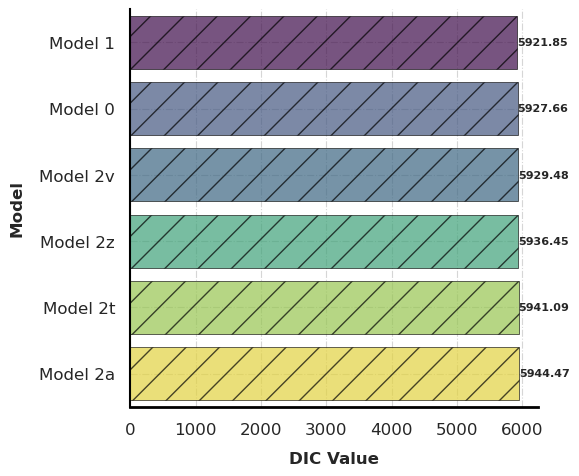

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ê®°ÊãüDICÊï∞ÊçÆÔºå‰ΩøÁî®Ê®°ÂûãÁöÑÂÖ∑‰ΩìÂêçÁß∞
dic_dict = {
    "Model 1": m0.dic,
    "Model 0": m1.dic,
    "Model 2a": m2a.dic,
    "Model 2t": m2t.dic,
    "Model 2v": m2v.dic,
    "Model 2z": m2z.dic,
}

# Â∞ÜÂ≠óÂÖ∏ËΩ¨Êç¢‰∏∫Pandas DataFrame,Âπ∂ÊåâÁÖßDICÂÄºÂçáÂ∫èÊéíÂ∫è
comp_dic = pd.DataFrame.from_dict(dic_dict, orient='index', columns=['DIC'])
comp_dic['model'] = comp_dic.index
comp_dic = comp_dic[['model', 'DIC']]
comp_dic = comp_dic.sort_values(by=['DIC'], ascending=True)

# ÊâìÂç∞‰∏âÁ∫øË°®
print(comp_dic.to_markdown(index=False, tablefmt="grid"))

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†ºÔºå‰ΩøÁî®Á¨¶ÂêàNatureÈ£éÊ†ºÁöÑÁÆÄÊ¥Å‰∏ªÈ¢ò
sns.set(style="whitegrid", font_scale=1.2)

# ÂàõÂª∫È¢úËâ≤Êò†Â∞ÑÔºåÈ¢úËâ≤Ë∂äÂ§ßË∂äÊ∑±
norm = plt.Normalize(comp_dic['DIC'].min(), comp_dic['DIC'].max())
colors = plt.cm.viridis(norm(comp_dic['DIC']))  # ‰ΩøÁî® vivid Ëâ≤ÂΩ©Êò†Â∞Ñ

# ÂàõÂª∫Êü±Áä∂ÂõæÔºåÂ∞Ü X Âíå Y ËΩ¥ÂØπË∞É
plt.figure(figsize=(6, 5))
bar_plot = sns.barplot(y='model', x='DIC', data=comp_dic, palette=colors)

# ‰∏∫Êü±Áä∂Âõæ‰∏≠ÁöÑÊØè‰∏™Êü±Â≠êËÆæÁΩÆÈÄèÊòéÂ∫¶„ÄÅËæπÊ°ÜÁ≤óÁªÜÂíåËä±Á∫π
for patch in bar_plot.patches:
    patch.set_alpha(0.7)  # ËÆæÁΩÆÈÄèÊòéÂ∫¶‰∏∫0.7
    patch.set_edgecolor('black')  # ËÆæÁΩÆËæπÊ°ÜÈ¢úËâ≤‰∏∫ÈªëËâ≤
    patch.set_linewidth(0.6)  # ËÆæÁΩÆËæπÊ°ÜÁ≤óÁªÜ‰∏∫0.6
    patch.set_hatch('/')  # ËÆæÁΩÆËä±Á∫πÔºå'/'Ë°®Á§∫ÊñúÁ∫ø

# Âú®Êü±Â≠ê‰∏äÊ†áÊ≥®ÂÖ∑‰ΩìÊï∞ÂÄº
for i, patch in enumerate(bar_plot.patches):
    width = patch.get_width()
    bar_plot.text(width + 0.5,  # Êï∞ÂÄºÊ†áÁ≠æÁöÑxÂùêÊ†áÁ®çÈ´ò‰∫éÊü±Â≠êÈ°∂ÈÉ®
                  patch.get_y() + patch.get_height() / 2,
                  f'{width:.2f}',  # ÊòæÁ§∫2‰ΩçÂ∞èÊï∞
                  ha='left', 
                  va='center', 
                  fontsize=8, 
                  weight='bold')

# Ê∑ªÂä†ÂõæÂΩ¢Ê†áÈ¢òÂíåÂùêÊ†áËΩ¥Ê†áÁ≠æ
bar_plot.set_ylabel("Model", fontsize=12, weight='bold')
bar_plot.set_xlabel("DIC Value", fontsize=12, weight='bold')

# Ë∞ÉÊï¥Ê†áÁ≠æÂíåÈ£éÊ†ºÔºåÂèÇËÄÉNatureÈ£éÊ†º
bar_plot.tick_params(axis='both', which='major', labelsize=12)
bar_plot.spines['top'].set_visible(False)
bar_plot.spines['right'].set_visible(False)

# ËÆæÁΩÆÂ∑¶ÂíåÂ∫ïÈÉ®ÁöÑËæπÊ°Ü‰∏∫ÈªëËâ≤ÔºåÂπ∂Âä†Á≤ó
bar_plot.spines['left'].set_linewidth(1.5)
bar_plot.spines['left'].set_color('black')  # Êîπ‰∏∫ÈªëËâ≤
bar_plot.spines['bottom'].set_linewidth(2)
bar_plot.spines['bottom'].set_color('black')  # Êîπ‰∏∫ÈªëËâ≤

# ËÆæÁΩÆÁΩëÊ†ºÁ∫øÁöÑÈÄèÊòéÂ∫¶ÂíåÁ≤óÁªÜ
bar_plot.grid(True, which='major', axis='x', linestyle='-.', linewidth=0.8, alpha=0.8)  # Áé∞Âú®ÂØπxËΩ¥Â∫îÁî®ÁΩëÊ†ºÁ∫ø
bar_plot.grid(True, which='major', axis='y', linestyle='-.', linewidth=0.8, alpha=0.8)

# Ë∞ÉÊï¥Â∏ÉÂ±Ä‰ª•Èò≤Ê≠¢Ê†áÁ≠æË¢´Êà™Êñ≠
plt.tight_layout()

# ‰øùÂ≠òÂõæÁâáÂà∞ÊåáÂÆöÊñá‰ª∂Â§πÔºåÂπ∂Á°Æ‰øù‰∏ç‰ºöÊà™Êñ≠ÂõæÂÉè
plt.savefig("4.Ê®°ÂûãÊØîËæÉ-ËæìÂá∫/DIC_comparison-m2.jpg", dpi=600, format='jpeg', bbox_inches='tight')  # ‰ΩøÁî®bbox_inches='tight'Êù•Èò≤Ê≠¢Êà™Êñ≠

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

In [49]:
# ËÆ°ÁÆóÊ®°ÂûãÈó¥ÁöÑ DIC Â∑ÆÂºÇ
comp_dic['ŒîDIC'] = comp_dic['DIC'] - comp_dic['DIC'].min()

# ÊâìÂç∞‰∏âÁ∫øË°®
print(comp_dic.to_markdown(index=False, tablefmt="grid"))

+----------+---------+----------+
| model    |     DIC |     ŒîDIC |
+==========+=========+==========+
| Model 1  | 5921.85 |  0       |
+----------+---------+----------+
| Model 0  | 5927.66 |  5.80568 |
+----------+---------+----------+
| Model 2v | 5929.48 |  7.62442 |
+----------+---------+----------+
| Model 2z | 5936.45 | 14.6009  |
+----------+---------+----------+
| Model 2t | 5941.09 | 19.2399  |
+----------+---------+----------+
| Model 2a | 5944.47 | 22.6128  |
+----------+---------+----------+


## 5. ÁªüËÆ°Êé®Êñ≠

ËøôÈáåÊàë‰ª¨‰ªÖÁ§∫ËåÉÂ¶Ç‰Ωï‰ΩøÁî® ROPE + HDI ÊñπÊ≥ï„ÄÇ

ÂÅáËÆæÊàë‰ª¨ÂØπÂÜ≤Á™ÅÊ∞¥Âπ≥ÂØπÊºÇÁßªÁéá v ÁöÑÂΩ±ÂìçÊÑüÂÖ¥Ë∂£ÔºåÂπ∂‰∏îÊàë‰ª¨‰ΩøÁî® [-0.2, 0.2] ‰Ωú‰∏∫ ROPE„ÄÇ
ÁÑ∂ÂêéÊàë‰ª¨ÂèØ‰ª•‰ΩøÁî® az.plot_posterior() ÂèØËßÜÂåñ ROPE Âíå HDI„ÄÇ4

### 1.Êü•ÁúãÂ≠óÊÆµ + ËæìÂá∫ÂêéÈ™åÂèÇÊï∞

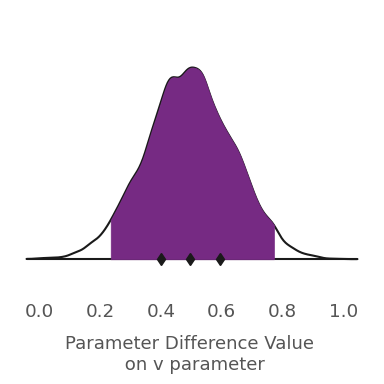

In [35]:
import os
import arviz as az
import matplotlib.pyplot as plt

# ÂÆö‰πâÊ®°ÂûãÂíåÂèÇÊï∞
model_data = {
    'm2v': ('v_C(Group, Treatment(\'2\'))[T.1]', m2v_infdata)  # ÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
}

# ÈÅçÂéÜÊ®°ÂûãÂíåÂèÇÊï∞
for model_name, (param, infdata) in model_data.items():
    # ÂàõÂª∫ÂõæÂΩ¢ÂíåÂ≠êÂõæ
    fig, ax = plt.subplots(figsize=(4, 4))

    # ËÆæÁΩÆËÉåÊôØÈÄèÊòé
    ax.set_facecolor("none")

    # ÁªòÂà∂ÂêéÈ™åÂàÜÂ∏ÉÔºàÊ£ÆÊûóÂõæ / ridge plotÔºâ
    az.plot_forest(
        infdata,
        kind='ridgeplot',
        var_names=[param],  # Âè™ÈíàÂØπÁâπÂÆöÂèÇÊï∞
        linewidth=1.5,
        ridgeplot_overlap=3,  # Ë∞ÉÊï¥ÈáçÂè†Á®ãÂ∫¶
        ridgeplot_truncate=False,
        ridgeplot_quantiles=[0.25, 0.5, 0.75],  # Ê∑ªÂä†ÂõõÂàÜ‰ΩçÊï∞
        combined=True,
        colors='#762a83',  # ‰ΩøÁî®Ëá™ÂÆö‰πâÈ¢úËâ≤
        ax=ax
    )

    # ÁßªÈô§ Y ËΩ¥Ê†áÁ≠æ
    ax.set_yticks([])
    ax.set_yticklabels([])

    # ËÆæÁΩÆÊ†áÈ¢òÂíåËΩ¥Ê†áÁ≠æ
   
    ax.set_xlabel('Parameter Difference Value \n on v parameter', fontsize=13)  # XËΩ¥Ê†áÁ≠æ

    # Ë∞ÉÊï¥Â∏ÉÂ±Ä
    plt.tight_layout()

    # Á°Æ‰øù‰øùÂ≠òË∑ØÂæÑÂ≠òÂú®
    save_dir = '6.ÁªüËÆ°Êé®Êñ≠-ËæìÂá∫/ÁªÑÈó¥Â∑ÆÂºÇ'
    os.makedirs(save_dir, exist_ok=True)  # Ëá™Âä®ÂàõÂª∫Êñá‰ª∂Â§π

    # ‰øùÂ≠òÂõæÂÉè
    save_path = os.path.join(save_dir, f'Differences_in_FES_and_ChSz_patients_{model_name}.jpg')
    plt.savefig(save_path, dpi=1200, bbox_inches='tight', transparent=True)  # ËÆæÁΩÆÈÄèÊòéËÉåÊôØ

    # ÊòæÁ§∫ÂõæÂÉè
    plt.show()

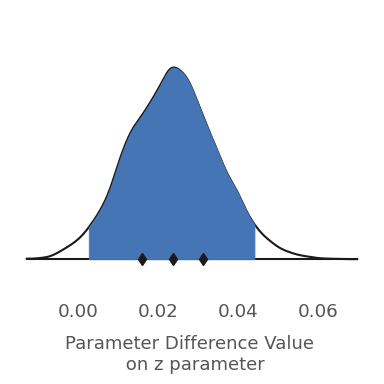

In [36]:
import os
import arviz as az
import matplotlib.pyplot as plt

# ÂÆö‰πâÊ®°ÂûãÂíåÂèÇÊï∞
model_data = {
    'm2z': ('z_C(Group, Treatment(\'2\'))[T.1]', m2z_infdata)  # ÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
}

# ÈÅçÂéÜÊ®°ÂûãÂíåÂèÇÊï∞
for model_name, (param, infdata) in model_data.items():
    # ÂàõÂª∫ÂõæÂΩ¢ÂíåÂ≠êÂõæ
    fig, ax = plt.subplots(figsize=(4, 4))

    # ËÆæÁΩÆËÉåÊôØÈÄèÊòé
    ax.set_facecolor("none")

    # ÁªòÂà∂ÂêéÈ™åÂàÜÂ∏ÉÔºàÊ£ÆÊûóÂõæ / ridge plotÔºâ
    az.plot_forest(
        infdata,
        kind='ridgeplot',
        var_names=[param],  # Âè™ÈíàÂØπÁâπÂÆöÂèÇÊï∞
        linewidth=1.5,
        ridgeplot_overlap=3,  # Ë∞ÉÊï¥ÈáçÂè†Á®ãÂ∫¶
        ridgeplot_truncate=False,
        ridgeplot_quantiles=[0.25, 0.5, 0.75],  # Ê∑ªÂä†ÂõõÂàÜ‰ΩçÊï∞
        combined=True,
        colors='#4575b4',  # ‰ΩøÁî®Ëá™ÂÆö‰πâÈ¢úËâ≤
        ax=ax
    )

    # ÁßªÈô§ Y ËΩ¥Ê†áÁ≠æ
    ax.set_yticks([])
    ax.set_yticklabels([])

    # ËÆæÁΩÆÊ†áÈ¢òÂíåËΩ¥Ê†áÁ≠æ
   
    ax.set_xlabel('Parameter Difference Value \n on z parameter', fontsize=13)  # XËΩ¥Ê†áÁ≠æ

    # Ë∞ÉÊï¥Â∏ÉÂ±Ä
    plt.tight_layout()

    # Á°Æ‰øù‰øùÂ≠òË∑ØÂæÑÂ≠òÂú®
    save_dir = '6.ÁªüËÆ°Êé®Êñ≠-ËæìÂá∫/ÁªÑÈó¥Â∑ÆÂºÇ'
    os.makedirs(save_dir, exist_ok=True)  # Ëá™Âä®ÂàõÂª∫Êñá‰ª∂Â§π

    # ‰øùÂ≠òÂõæÂÉè
    save_path = os.path.join(save_dir, f'Differences_in_FES_and_ChSz_patients_{model_name}.jpg')
    plt.savefig(save_path, dpi=1200, bbox_inches='tight', transparent=True)  # ËÆæÁΩÆÈÄèÊòéËÉåÊôØ

    # ÊòæÁ§∫ÂõæÂÉè
    plt.show()

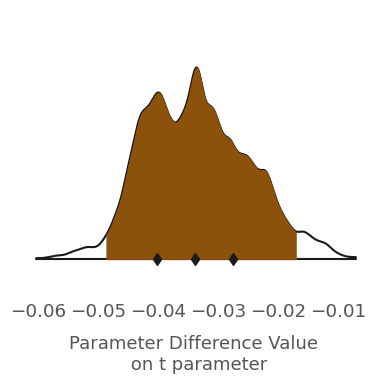

In [37]:
import os
import arviz as az
import matplotlib.pyplot as plt

# ÂÆö‰πâÊ®°ÂûãÂíåÂèÇÊï∞
model_data = {
    'm2t': ('t_C(Group, Treatment(\'2\'))[T.1]', m2t_infdata)  # ÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
}

# ÈÅçÂéÜÊ®°ÂûãÂíåÂèÇÊï∞
for model_name, (param, infdata) in model_data.items():
    # ÂàõÂª∫ÂõæÂΩ¢ÂíåÂ≠êÂõæ
    fig, ax = plt.subplots(figsize=(4, 4))

    # ËÆæÁΩÆËÉåÊôØÈÄèÊòé
    ax.set_facecolor("none")

    # ÁªòÂà∂ÂêéÈ™åÂàÜÂ∏ÉÔºàÊ£ÆÊûóÂõæ / ridge plotÔºâ
    az.plot_forest(
        infdata,
        kind='ridgeplot',
        var_names=[param],  # Âè™ÈíàÂØπÁâπÂÆöÂèÇÊï∞
        linewidth=1.5,
        ridgeplot_overlap=3,  # Ë∞ÉÊï¥ÈáçÂè†Á®ãÂ∫¶
        ridgeplot_truncate=False,
        ridgeplot_quantiles=[0.25, 0.5, 0.75],  # Ê∑ªÂä†ÂõõÂàÜ‰ΩçÊï∞
        combined=True,
        colors='#8c510a',  # ‰ΩøÁî®Ëá™ÂÆö‰πâÈ¢úËâ≤
        ax=ax
    )

    # ÁßªÈô§ Y ËΩ¥Ê†áÁ≠æ
    ax.set_yticks([])
    ax.set_yticklabels([])

    # ËÆæÁΩÆÊ†áÈ¢òÂíåËΩ¥Ê†áÁ≠æ
   
    ax.set_xlabel('Parameter Difference Value \n on t parameter', fontsize=13)  # XËΩ¥Ê†áÁ≠æ

    # Ë∞ÉÊï¥Â∏ÉÂ±Ä
    plt.tight_layout()

    # Á°Æ‰øù‰øùÂ≠òË∑ØÂæÑÂ≠òÂú®
    save_dir = '6.ÁªüËÆ°Êé®Êñ≠-ËæìÂá∫/ÁªÑÈó¥Â∑ÆÂºÇ'
    os.makedirs(save_dir, exist_ok=True)  # Ëá™Âä®ÂàõÂª∫Êñá‰ª∂Â§π

    # ‰øùÂ≠òÂõæÂÉè
    save_path = os.path.join(save_dir, f'Differences_in_FES_and_ChSz_patients_{model_name}.jpg')
    plt.savefig(save_path, dpi=1200, bbox_inches='tight', transparent=True)  # ËÆæÁΩÆÈÄèÊòéËÉåÊôØ

    # ÊòæÁ§∫ÂõæÂÉè
    plt.show()

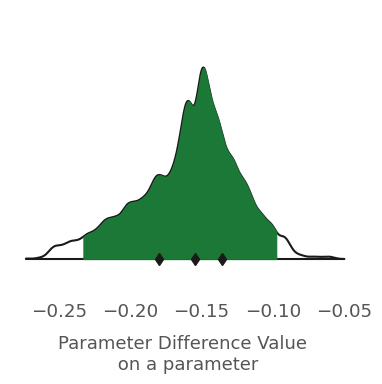

In [43]:
import os
import arviz as az
import matplotlib.pyplot as plt

# ÂÆö‰πâÊ®°ÂûãÂíåÂèÇÊï∞
model_data = {
    'm2a': ('a_C(Group, Treatment(\'2\'))[T.1]', m2a_infdata)  # ÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
}

# ÈÅçÂéÜÊ®°ÂûãÂíåÂèÇÊï∞
for model_name, (param, infdata) in model_data.items():
    # ÂàõÂª∫ÂõæÂΩ¢ÂíåÂ≠êÂõæ
    fig, ax = plt.subplots(figsize=(4, 4))

    # ËÆæÁΩÆËÉåÊôØÈÄèÊòé
    ax.set_facecolor("none")

    # ÁªòÂà∂ÂêéÈ™åÂàÜÂ∏ÉÔºàÊ£ÆÊûóÂõæ / ridge plotÔºâ
    az.plot_forest(
        infdata,
        kind='ridgeplot',
        var_names=[param],  # Âè™ÈíàÂØπÁâπÂÆöÂèÇÊï∞
        linewidth=1.5,
        ridgeplot_overlap=3,  # Ë∞ÉÊï¥ÈáçÂè†Á®ãÂ∫¶
        ridgeplot_truncate=False,
        ridgeplot_quantiles=[0.25, 0.5, 0.75],  # Ê∑ªÂä†ÂõõÂàÜ‰ΩçÊï∞
        combined=True,
        colors='#1b7837',  # ‰ΩøÁî®Ëá™ÂÆö‰πâÈ¢úËâ≤
        ax=ax
    )

    # ÁßªÈô§ Y ËΩ¥Ê†áÁ≠æ
    ax.set_yticks([])
    ax.set_yticklabels([])

    # ËÆæÁΩÆÊ†áÈ¢òÂíåËΩ¥Ê†áÁ≠æ
   
    ax.set_xlabel('Parameter Difference Value \n on a parameter', fontsize=13)  # XËΩ¥Ê†áÁ≠æ

    # Ë∞ÉÊï¥Â∏ÉÂ±Ä
    plt.tight_layout()

    # Á°Æ‰øù‰øùÂ≠òË∑ØÂæÑÂ≠òÂú®
    save_dir = '6.ÁªüËÆ°Êé®Êñ≠-ËæìÂá∫/ÁªÑÈó¥Â∑ÆÂºÇ'
    os.makedirs(save_dir, exist_ok=True)  # Ëá™Âä®ÂàõÂª∫Êñá‰ª∂Â§π

    # ‰øùÂ≠òÂõæÂÉè
    save_path = os.path.join(save_dir, f'Differences_in_FES_and_ChSz_patients_{model_name}.jpg')
    plt.savefig(save_path, dpi=1200, bbox_inches='tight', transparent=True)  # ËÆæÁΩÆÈÄèÊòéËÉåÊôØ

    # ÊòæÁ§∫ÂõæÂÉè
    plt.show()

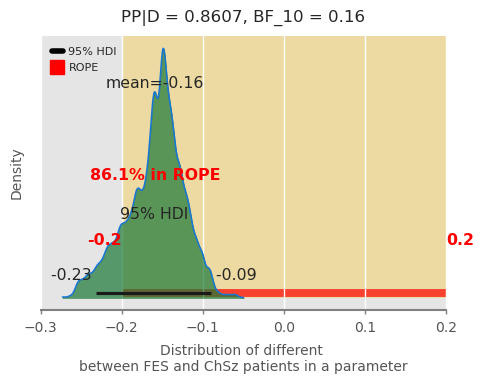

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Parameter  ‚îÇ Mean Difference ‚îÇ 95% HDI Lower ‚îÇ 95% HDI Upper ‚îÇ   PP|D    ‚îÇ BF_{10} ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ a_C(Group, ‚îÇ        -0.1587 ‚îÇ       -0.2312 ‚îÇ       -0.0899 ‚îÇ     0.8607 ‚îÇ    0.16 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [38]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# ÈÖçÁΩÆÂÖ®Â±ÄÊ†∑Âºè
plt.style.use('ggplot')  # Êõ¥Êç¢ÂõæÈ£éÊ†º‰∏∫ 'ggplot'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

# ÂÆö‰πâÊ®°ÂûãÂíåÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
model_data = {
    'm2a': ('a_C(Group, Treatment(\'2\'))[T.1]', m2a_infdata)  # ÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
}

# ÂàõÂª∫ÂçïË°åÂõæÂ∏ÉÂ±Ä
fig, axes = plt.subplots(1, 1, figsize=(5, 4))  # Âçï‰∏™Â≠êÂõæ

# Â≠òÂÇ®ÁªìÊûúÁöÑÂàóË°®
results = []

# ÈÅçÂéÜÊ®°ÂûãÂíåÂèÇÊï∞
for model_name, (param, infdata) in model_data.items():
    # ÊèêÂèñÂêéÈ™åÊ†∑Êú¨
    posterior_samples = infdata.posterior[param].values.flatten()

    # ËÆ°ÁÆóÂêéÈ™åÂàÜÂ∏ÉÁöÑÂùáÂÄºÂíå 95% HDI
    mean_diff = posterior_samples.mean()
    hdi_95_diff = az.hdi(posterior_samples, hdi_prob=0.95)

    # ËÆ°ÁÆó PP|DÔºàÂ∑ÆÂºÇÊòØÂê¶Êé•Ëøë0Ôºâ
    ppd_diff = ((posterior_samples > -0.2) & (posterior_samples < 0.2)).mean()

    # ËÆ°ÁÆó BF_{10}
    bf_10_diff = (1 - ppd_diff) / ppd_diff

    # ÁªòÂà∂ÂêéÈ™åÂàÜÂ∏ÉÂõæ
    az.plot_posterior(
        posterior_samples,
        kind='kde',
        hdi_prob=0.95,
        rope=[-0.2, 0.2],
        textsize=10,
        rope_color='red',
        ax=axes,
        color='#1976D2',
    )

    # Ëé∑ÂèñxÂíåyÂùêÊ†áÔºåÁî®‰∫éÂ°´ÂÖÖ
    x_vals = axes.lines[0].get_xdata()
    y_vals = axes.lines[0].get_ydata()

    # ‰ΩøÁî® fill_between ÊñπÊ≥ïËøõË°åÂ°´ÂÖÖ
    axes.fill_between(x_vals, y_vals, color='#1b7837', alpha=0.7)

    # ËÆæÁΩÆÂõæÂΩ¢Ê†ºÂºè
    axes.set_xlim(-0.3, 0.2)  # Ê†πÊçÆÊï∞ÊçÆËåÉÂõ¥Ë∞ÉÊï¥ X ËΩ¥ËåÉÂõ¥
    axes.set_xlabel(f'Distribution of different \nbetween FES and ChSz patients in a parameter', fontsize=10, labelpad=6)
    axes.set_ylabel('Density', fontsize=10, labelpad=12)
    axes.set_title(f'PP|D = {ppd_diff:.4f}, BF_{10} = {bf_10_diff:.2f}', fontsize=12, pad=10)

    # Ê∑ªÂä†Â°´ÂÖÖÁü©ÂΩ¢
    rect = plt.Rectangle((-0.2, 0), 0.4, axes.get_ylim()[1], 
                         linewidth=0, facecolor='#FFC107', alpha=0.3,
                         zorder=-1)
    axes.add_patch(rect)

    # Ëá™ÂÆö‰πâÂõæ‰æãÁ¨¶Âè∑
    custom_lines = [
        Line2D([0], [0], color='black', lw=4),  # ÈªëËâ≤Á∫øÔºåË°®Á§∫95% HDI
        Line2D([0], [0], color='red', marker='s', markersize=10, linestyle='None')  # Á∫¢Ëâ≤ÊñπÂùóÔºåË°®Á§∫ROPE
    ]

    # Ê∑ªÂä†Âõæ‰æã
    axes.legend(custom_lines, ["95% HDI", "ROPE"], loc='upper left', fontsize=8, 
                frameon=False, edgecolor='none', fancybox=False, 
                borderpad=0.5, handlelength=1.0, handletextpad=0.5)

    # Â≠òÂÇ®ÁªìÊûú
    results.append({
        "Parameter": param,
        "Mean Difference": mean_diff,
        "95% HDI Lower": hdi_95_diff[0],
        "95% HDI Upper": hdi_95_diff[1],
        "PP|D": ppd_diff,
        "BF_{10}": bf_10_diff
    })

# Ë∞ÉÊï¥Â∏ÉÂ±ÄÂíåÊòæÁ§∫ÂõæÂÉè
plt.tight_layout()
plt.savefig('6.ÁªüËÆ°Êé®Êñ≠-ËæìÂá∫/ÁªÑÈó¥Â∑ÆÂºÇ/a_C_Group_Treatment_2_m2a.jpg', dpi=1200, bbox_inches='tight', transparent=True)  # ËÆæÁΩÆÈÄèÊòéËÉåÊôØ
plt.show()

# Â∞ÜÁªìÊûúËΩ¨Êç¢‰∏∫ DataFrame Âπ∂ÊâìÂç∞‰∏∫‰∏âÁ∫øË°®
df_results = pd.DataFrame(results)

# Ê†ºÂºèÂåñÊï∞ÂÄº
df_results['Mean Difference'] = df_results['Mean Difference'].map('{:.4f}'.format)
df_results['95% HDI Lower'] = df_results['95% HDI Lower'].map('{:.4f}'.format)
df_results['95% HDI Upper'] = df_results['95% HDI Upper'].map('{:.4f}'.format)
df_results['PP|D'] = df_results['PP|D'].map('{:.4f}'.format)
df_results['BF_{10}'] = df_results['BF_{10}'].map('{:.2f}'.format)

# ÊâìÂç∞‰∏∫‰∏âÁ∫øË°®Ê†ºÂºè
print("‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê")
print("‚îÇ Parameter  ‚îÇ Mean Difference ‚îÇ 95% HDI Lower ‚îÇ 95% HDI Upper ‚îÇ   PP|D    ‚îÇ BF_{10} ‚îÇ")
print("‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§")
for index, row in df_results.iterrows():
    print(f"‚îÇ {row['Parameter'][:10]:>10} ‚îÇ {row['Mean Difference']:>14} ‚îÇ {row['95% HDI Lower']:>13} ‚îÇ {row['95% HDI Upper']:>13} ‚îÇ {row['PP|D']:>10} ‚îÇ {row['BF_{10}']:>7} ‚îÇ")
print("‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò")

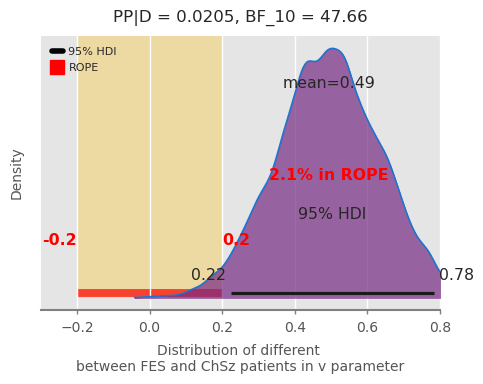

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Parameter  ‚îÇ Mean Difference ‚îÇ 95% HDI Lower ‚îÇ 95% HDI Upper ‚îÇ   PP|D    ‚îÇ BF_{10} ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ v_C(Group, ‚îÇ         0.4941 ‚îÇ        0.2244 ‚îÇ        0.7826 ‚îÇ     0.0205 ‚îÇ   47.66 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [39]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# ÈÖçÁΩÆÂÖ®Â±ÄÊ†∑Âºè
plt.style.use('ggplot')  # Êõ¥Êç¢ÂõæÈ£éÊ†º‰∏∫ 'ggplot'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

# ÂÆö‰πâÊ®°ÂûãÂíåÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
model_data = {
    'm2v': ('v_C(Group, Treatment(\'2\'))[T.1]', m2v_infdata)  # ÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
}

# ÂàõÂª∫ÂçïË°åÂõæÂ∏ÉÂ±Ä
fig, axes = plt.subplots(1, 1, figsize=(5, 4))  # Âçï‰∏™Â≠êÂõæ

# Â≠òÂÇ®ÁªìÊûúÁöÑÂàóË°®
results = []

# ÈÅçÂéÜÊ®°ÂûãÂíåÂèÇÊï∞
for model_name, (param, infdata) in model_data.items():
    # ÊèêÂèñÂêéÈ™åÊ†∑Êú¨
    posterior_samples = infdata.posterior[param].values.flatten()

    # ËÆ°ÁÆóÂêéÈ™åÂàÜÂ∏ÉÁöÑÂùáÂÄºÂíå 95% HDI
    mean_diff = posterior_samples.mean()
    hdi_95_diff = az.hdi(posterior_samples, hdi_prob=0.95)

    # ËÆ°ÁÆó PP|DÔºàÂ∑ÆÂºÇÊòØÂê¶Êé•Ëøë0Ôºâ
    ppd_diff = ((posterior_samples > -0.2) & (posterior_samples < 0.2)).mean()

    # ËÆ°ÁÆó BF_{10}
    bf_10_diff = (1 - ppd_diff) / ppd_diff

    # ÁªòÂà∂ÂêéÈ™åÂàÜÂ∏ÉÂõæ
    az.plot_posterior(
        posterior_samples,
        kind='kde',
        hdi_prob=0.95,
        rope=[-0.2, 0.2],
        textsize=10,
        rope_color='red',
        ax=axes,
        color='#1976D2',
    )

    # Ëé∑ÂèñxÂíåyÂùêÊ†áÔºåÁî®‰∫éÂ°´ÂÖÖ
    x_vals = axes.lines[0].get_xdata()
    y_vals = axes.lines[0].get_ydata()

    # ‰ΩøÁî® fill_between ÊñπÊ≥ïËøõË°åÂ°´ÂÖÖ
    axes.fill_between(x_vals, y_vals, color='#762a83', alpha=0.7)

    # ËÆæÁΩÆÂõæÂΩ¢Ê†ºÂºè
    axes.set_xlim(-0.3, 0.8)  # Ê†πÊçÆÊï∞ÊçÆËåÉÂõ¥Ë∞ÉÊï¥ X ËΩ¥ËåÉÂõ¥
    axes.set_xlabel(f'Distribution of different \nbetween FES and ChSz patients in v parameter', fontsize=10, labelpad=6)
    axes.set_ylabel('Density', fontsize=10, labelpad=12)
    axes.set_title(f'PP|D = {ppd_diff:.4f}, BF_{10} = {bf_10_diff:.2f}', fontsize=12, pad=10)

    # Ê∑ªÂä†Â°´ÂÖÖÁü©ÂΩ¢
    rect = plt.Rectangle((-0.2, 0), 0.4, axes.get_ylim()[1], 
                         linewidth=0, facecolor='#FFC107', alpha=0.3,
                         zorder=-1)
    axes.add_patch(rect)

    # Ëá™ÂÆö‰πâÂõæ‰æãÁ¨¶Âè∑
    custom_lines = [
        Line2D([0], [0], color='black', lw=4),  # ÈªëËâ≤Á∫øÔºåË°®Á§∫95% HDI
        Line2D([0], [0], color='red', marker='s', markersize=10, linestyle='None')  # Á∫¢Ëâ≤ÊñπÂùóÔºåË°®Á§∫ROPE
    ]

    # Ê∑ªÂä†Âõæ‰æã
    axes.legend(custom_lines, ["95% HDI", "ROPE"], loc='upper left', fontsize=8, 
                frameon=False, edgecolor='none', fancybox=False, 
                borderpad=0.5, handlelength=1.0, handletextpad=0.5)

    # Â≠òÂÇ®ÁªìÊûú
    results.append({
        "Parameter": param,
        "Mean Difference": mean_diff,
        "95% HDI Lower": hdi_95_diff[0],
        "95% HDI Upper": hdi_95_diff[1],
        "PP|D": ppd_diff,
        "BF_{10}": bf_10_diff
    })

# Ë∞ÉÊï¥Â∏ÉÂ±ÄÂíåÊòæÁ§∫ÂõæÂÉè
plt.tight_layout()
plt.savefig('6.ÁªüËÆ°Êé®Êñ≠-ËæìÂá∫/ÁªÑÈó¥Â∑ÆÂºÇ/a_C_Group_Treatment_2_m2v.jpg', dpi=1200, bbox_inches='tight', transparent=True)  # ËÆæÁΩÆÈÄèÊòéËÉåÊôØ
plt.show()

# Â∞ÜÁªìÊûúËΩ¨Êç¢‰∏∫ DataFrame Âπ∂ÊâìÂç∞‰∏∫‰∏âÁ∫øË°®
df_results = pd.DataFrame(results)

# Ê†ºÂºèÂåñÊï∞ÂÄº
df_results['Mean Difference'] = df_results['Mean Difference'].map('{:.4f}'.format)
df_results['95% HDI Lower'] = df_results['95% HDI Lower'].map('{:.4f}'.format)
df_results['95% HDI Upper'] = df_results['95% HDI Upper'].map('{:.4f}'.format)
df_results['PP|D'] = df_results['PP|D'].map('{:.4f}'.format)
df_results['BF_{10}'] = df_results['BF_{10}'].map('{:.2f}'.format)

# ÊâìÂç∞‰∏∫‰∏âÁ∫øË°®Ê†ºÂºè
print("‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê")
print("‚îÇ Parameter  ‚îÇ Mean Difference ‚îÇ 95% HDI Lower ‚îÇ 95% HDI Upper ‚îÇ   PP|D    ‚îÇ BF_{10} ‚îÇ")
print("‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§")
for index, row in df_results.iterrows():
    print(f"‚îÇ {row['Parameter'][:10]:>10} ‚îÇ {row['Mean Difference']:>14} ‚îÇ {row['95% HDI Lower']:>13} ‚îÇ {row['95% HDI Upper']:>13} ‚îÇ {row['PP|D']:>10} ‚îÇ {row['BF_{10}']:>7} ‚îÇ")
print("‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò")

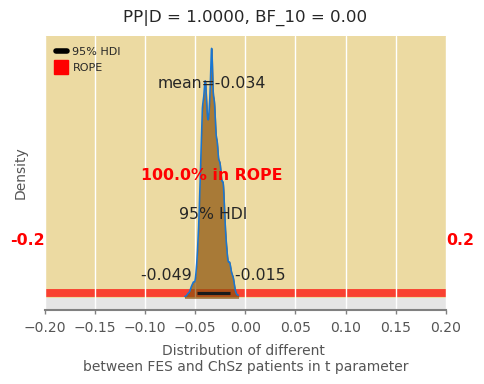

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Parameter  ‚îÇ Mean Difference ‚îÇ 95% HDI Lower ‚îÇ 95% HDI Upper ‚îÇ   PP|D    ‚îÇ BF_{10} ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ t_C(Group, ‚îÇ        -0.0336 ‚îÇ       -0.0486 ‚îÇ       -0.0155 ‚îÇ     1.0000 ‚îÇ    0.00 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [40]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# ÈÖçÁΩÆÂÖ®Â±ÄÊ†∑Âºè
plt.style.use('ggplot')  # Êõ¥Êç¢ÂõæÈ£éÊ†º‰∏∫ 'ggplot'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

# ÂÆö‰πâÊ®°ÂûãÂíåÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
model_data = {
    'm2t': ('t_C(Group, Treatment(\'2\'))[T.1]', m2t_infdata)  # ÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
}

# ÂàõÂª∫ÂçïË°åÂõæÂ∏ÉÂ±Ä
fig, axes = plt.subplots(1, 1, figsize=(5, 4))  # Âçï‰∏™Â≠êÂõæ

# Â≠òÂÇ®ÁªìÊûúÁöÑÂàóË°®
results = []

# ÈÅçÂéÜÊ®°ÂûãÂíåÂèÇÊï∞
for model_name, (param, infdata) in model_data.items():
    # ÊèêÂèñÂêéÈ™åÊ†∑Êú¨
    posterior_samples = infdata.posterior[param].values.flatten()

    # ËÆ°ÁÆóÂêéÈ™åÂàÜÂ∏ÉÁöÑÂùáÂÄºÂíå 95% HDI
    mean_diff = posterior_samples.mean()
    hdi_95_diff = az.hdi(posterior_samples, hdi_prob=0.95)

    # ËÆ°ÁÆó PP|DÔºàÂ∑ÆÂºÇÊòØÂê¶Êé•Ëøë0Ôºâ
    ppd_diff = ((posterior_samples > -0.2) & (posterior_samples < 0.2)).mean()

    # ËÆ°ÁÆó BF_{10}
    bf_10_diff = (1 - ppd_diff) / ppd_diff

    # ÁªòÂà∂ÂêéÈ™åÂàÜÂ∏ÉÂõæ
    az.plot_posterior(
        posterior_samples,
        kind='kde',
        hdi_prob=0.95,
        rope=[-0.2, 0.2],
        textsize=10,
        rope_color='red',
        ax=axes,
        color='#1976D2',
    )

    # Ëé∑ÂèñxÂíåyÂùêÊ†áÔºåÁî®‰∫éÂ°´ÂÖÖ
    x_vals = axes.lines[0].get_xdata()
    y_vals = axes.lines[0].get_ydata()

    # ‰ΩøÁî® fill_between ÊñπÊ≥ïËøõË°åÂ°´ÂÖÖ
    axes.fill_between(x_vals, y_vals, color='#8c510a', alpha=0.7)

    # ËÆæÁΩÆÂõæÂΩ¢Ê†ºÂºè
    axes.set_xlim(-0.2, 0.2)  # Ê†πÊçÆÊï∞ÊçÆËåÉÂõ¥Ë∞ÉÊï¥ X ËΩ¥ËåÉÂõ¥
    axes.set_xlabel(f'Distribution of different \nbetween FES and ChSz patients in t parameter', fontsize=10, labelpad=6)
    axes.set_ylabel('Density', fontsize=10, labelpad=12)
    axes.set_title(f'PP|D = {ppd_diff:.4f}, BF_{10} = {bf_10_diff:.2f}', fontsize=12, pad=10)

    # Ê∑ªÂä†Â°´ÂÖÖÁü©ÂΩ¢
    rect = plt.Rectangle((-0.2, 0), 0.4, axes.get_ylim()[1], 
                         linewidth=0, facecolor='#FFC107', alpha=0.3,
                         zorder=-1)
    axes.add_patch(rect)

    # Ëá™ÂÆö‰πâÂõæ‰æãÁ¨¶Âè∑
    custom_lines = [
        Line2D([0], [0], color='black', lw=4),  # ÈªëËâ≤Á∫øÔºåË°®Á§∫95% HDI
        Line2D([0], [0], color='red', marker='s', markersize=10, linestyle='None')  # Á∫¢Ëâ≤ÊñπÂùóÔºåË°®Á§∫ROPE
    ]

    # Ê∑ªÂä†Âõæ‰æã
    axes.legend(custom_lines, ["95% HDI", "ROPE"], loc='upper left', fontsize=8, 
                frameon=False, edgecolor='none', fancybox=False, 
                borderpad=0.5, handlelength=1.0, handletextpad=0.5)

    # Â≠òÂÇ®ÁªìÊûú
    results.append({
        "Parameter": param,
        "Mean Difference": mean_diff,
        "95% HDI Lower": hdi_95_diff[0],
        "95% HDI Upper": hdi_95_diff[1],
        "PP|D": ppd_diff,
        "BF_{10}": bf_10_diff
    })

# Ë∞ÉÊï¥Â∏ÉÂ±ÄÂíåÊòæÁ§∫ÂõæÂÉè
plt.tight_layout()
plt.savefig('6.ÁªüËÆ°Êé®Êñ≠-ËæìÂá∫/ÁªÑÈó¥Â∑ÆÂºÇ/a_C_Group_Treatment_2_m2t.jpg', dpi=1200, bbox_inches='tight', transparent=True)  # ËÆæÁΩÆÈÄèÊòéËÉåÊôØ
plt.show()

# Â∞ÜÁªìÊûúËΩ¨Êç¢‰∏∫ DataFrame Âπ∂ÊâìÂç∞‰∏∫‰∏âÁ∫øË°®
df_results = pd.DataFrame(results)

# Ê†ºÂºèÂåñÊï∞ÂÄº
df_results['Mean Difference'] = df_results['Mean Difference'].map('{:.4f}'.format)
df_results['95% HDI Lower'] = df_results['95% HDI Lower'].map('{:.4f}'.format)
df_results['95% HDI Upper'] = df_results['95% HDI Upper'].map('{:.4f}'.format)
df_results['PP|D'] = df_results['PP|D'].map('{:.4f}'.format)
df_results['BF_{10}'] = df_results['BF_{10}'].map('{:.2f}'.format)

# ÊâìÂç∞‰∏∫‰∏âÁ∫øË°®Ê†ºÂºè
print("‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê")
print("‚îÇ Parameter  ‚îÇ Mean Difference ‚îÇ 95% HDI Lower ‚îÇ 95% HDI Upper ‚îÇ   PP|D    ‚îÇ BF_{10} ‚îÇ")
print("‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§")
for index, row in df_results.iterrows():
    print(f"‚îÇ {row['Parameter'][:10]:>10} ‚îÇ {row['Mean Difference']:>14} ‚îÇ {row['95% HDI Lower']:>13} ‚îÇ {row['95% HDI Upper']:>13} ‚îÇ {row['PP|D']:>10} ‚îÇ {row['BF_{10}']:>7} ‚îÇ")
print("‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò")

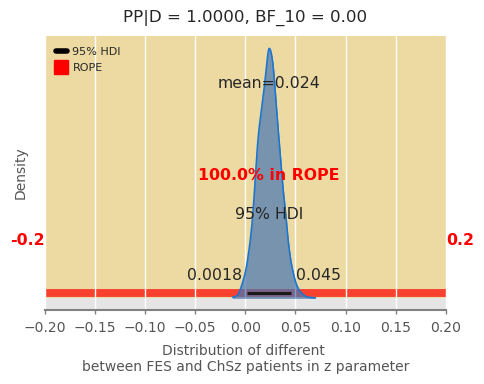

‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Parameter  ‚îÇ Mean Difference ‚îÇ 95% HDI Lower ‚îÇ 95% HDI Upper ‚îÇ   PP|D    ‚îÇ BF_{10} ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ z_C(Group, ‚îÇ         0.0237 ‚îÇ        0.0018 ‚îÇ        0.0453 ‚îÇ     1.0000 ‚îÇ    0.00 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò


In [41]:
import arviz as az
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.lines import Line2D

# ÈÖçÁΩÆÂÖ®Â±ÄÊ†∑Âºè
plt.style.use('ggplot')  # Êõ¥Êç¢ÂõæÈ£éÊ†º‰∏∫ 'ggplot'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['axes.labelpad'] = 10
plt.rcParams['xtick.major.pad'] = 5
plt.rcParams['ytick.major.pad'] = 5

# ÂÆö‰πâÊ®°ÂûãÂíåÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
model_data = {
    'm2z': ('z_C(Group, Treatment(\'2\'))[T.1]', m2z_infdata)  # ÊÑüÂÖ¥Ë∂£ÁöÑÂèÇÊï∞
}

# ÂàõÂª∫ÂçïË°åÂõæÂ∏ÉÂ±Ä
fig, axes = plt.subplots(1, 1, figsize=(5, 4))  # Âçï‰∏™Â≠êÂõæ

# Â≠òÂÇ®ÁªìÊûúÁöÑÂàóË°®
results = []

# ÈÅçÂéÜÊ®°ÂûãÂíåÂèÇÊï∞
for model_name, (param, infdata) in model_data.items():
    # ÊèêÂèñÂêéÈ™åÊ†∑Êú¨
    posterior_samples = infdata.posterior[param].values.flatten()

    # ËÆ°ÁÆóÂêéÈ™åÂàÜÂ∏ÉÁöÑÂùáÂÄºÂíå 95% HDI
    mean_diff = posterior_samples.mean()
    hdi_95_diff = az.hdi(posterior_samples, hdi_prob=0.95)

    # ËÆ°ÁÆó PP|DÔºàÂ∑ÆÂºÇÊòØÂê¶Êé•Ëøë0Ôºâ
    ppd_diff = ((posterior_samples > -0.2) & (posterior_samples < 0.2)).mean()

    # ËÆ°ÁÆó BF_{10}
    bf_10_diff = (1 - ppd_diff) / ppd_diff

    # ÁªòÂà∂ÂêéÈ™åÂàÜÂ∏ÉÂõæ
    az.plot_posterior(
        posterior_samples,
        kind='kde',
        hdi_prob=0.95,
        rope=[-0.2, 0.2],
        textsize=10,
        rope_color='red',
        ax=axes,
        color='#1976D2',
    )

    # Ëé∑ÂèñxÂíåyÂùêÊ†áÔºåÁî®‰∫éÂ°´ÂÖÖ
    x_vals = axes.lines[0].get_xdata()
    y_vals = axes.lines[0].get_ydata()

    # ‰ΩøÁî® fill_between ÊñπÊ≥ïËøõË°åÂ°´ÂÖÖ
    axes.fill_between(x_vals, y_vals, color='#4575b4', alpha=0.7)

    # ËÆæÁΩÆÂõæÂΩ¢Ê†ºÂºè
    axes.set_xlim(-0.2, 0.2)  # Ê†πÊçÆÊï∞ÊçÆËåÉÂõ¥Ë∞ÉÊï¥ X ËΩ¥ËåÉÂõ¥
    axes.set_xlabel(f'Distribution of different \nbetween FES and ChSz patients in z parameter', fontsize=10, labelpad=6)
    axes.set_ylabel('Density', fontsize=10, labelpad=12)
    axes.set_title(f'PP|D = {ppd_diff:.4f}, BF_{10} = {bf_10_diff:.2f}', fontsize=12, pad=10)

    # Ê∑ªÂä†Â°´ÂÖÖÁü©ÂΩ¢
    rect = plt.Rectangle((-0.2, 0), 0.4, axes.get_ylim()[1], 
                         linewidth=0, facecolor='#FFC107', alpha=0.3,
                         zorder=-1)
    axes.add_patch(rect)

    # Ëá™ÂÆö‰πâÂõæ‰æãÁ¨¶Âè∑
    custom_lines = [
        Line2D([0], [0], color='black', lw=4),  # ÈªëËâ≤Á∫øÔºåË°®Á§∫95% HDI
        Line2D([0], [0], color='red', marker='s', markersize=10, linestyle='None')  # Á∫¢Ëâ≤ÊñπÂùóÔºåË°®Á§∫ROPE
    ]

    # Ê∑ªÂä†Âõæ‰æã
    axes.legend(custom_lines, ["95% HDI", "ROPE"], loc='upper left', fontsize=8, 
                frameon=False, edgecolor='none', fancybox=False, 
                borderpad=0.5, handlelength=1.0, handletextpad=0.5)

    # Â≠òÂÇ®ÁªìÊûú
    results.append({
        "Parameter": param,
        "Mean Difference": mean_diff,
        "95% HDI Lower": hdi_95_diff[0],
        "95% HDI Upper": hdi_95_diff[1],
        "PP|D": ppd_diff,
        "BF_{10}": bf_10_diff
    })

# Ë∞ÉÊï¥Â∏ÉÂ±ÄÂíåÊòæÁ§∫ÂõæÂÉè
plt.tight_layout()
plt.savefig('6.ÁªüËÆ°Êé®Êñ≠-ËæìÂá∫/ÁªÑÈó¥Â∑ÆÂºÇ/a_C_Group_Treatment_2_m2z.jpg', dpi=1200, bbox_inches='tight', transparent=True)  # ËÆæÁΩÆÈÄèÊòéËÉåÊôØ
plt.show()

# Â∞ÜÁªìÊûúËΩ¨Êç¢‰∏∫ DataFrame Âπ∂ÊâìÂç∞‰∏∫‰∏âÁ∫øË°®
df_results = pd.DataFrame(results)

# Ê†ºÂºèÂåñÊï∞ÂÄº
df_results['Mean Difference'] = df_results['Mean Difference'].map('{:.4f}'.format)
df_results['95% HDI Lower'] = df_results['95% HDI Lower'].map('{:.4f}'.format)
df_results['95% HDI Upper'] = df_results['95% HDI Upper'].map('{:.4f}'.format)
df_results['PP|D'] = df_results['PP|D'].map('{:.4f}'.format)
df_results['BF_{10}'] = df_results['BF_{10}'].map('{:.2f}'.format)

# ÊâìÂç∞‰∏∫‰∏âÁ∫øË°®Ê†ºÂºè
print("‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê")
print("‚îÇ Parameter  ‚îÇ Mean Difference ‚îÇ 95% HDI Lower ‚îÇ 95% HDI Upper ‚îÇ   PP|D    ‚îÇ BF_{10} ‚îÇ")
print("‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§")
for index, row in df_results.iterrows():
    print(f"‚îÇ {row['Parameter'][:10]:>10} ‚îÇ {row['Mean Difference']:>14} ‚îÇ {row['95% HDI Lower']:>13} ‚îÇ {row['95% HDI Upper']:>13} ‚îÇ {row['PP|D']:>10} ‚îÇ {row['BF_{10}']:>7} ‚îÇ")
print("‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò")

In [42]:
print("‰ª£Á†ÅÂÖ®ÈÉ®ÂÆåÊàê!")

‰ª£Á†ÅÂÖ®ÈÉ®ÂÆåÊàê!
